In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import missingno as msno
import networkx as nx
from networkx import Graph

# **1. Eksplorasi Dataset dan Analisis Data Awal (EDA)**

In [ ]:
# path_accepted = 'C:/Users/Kayla/Downloads/archive (7)/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'
# path_rejected = 'C:/Users/Kayla/Downloads/archive (7)/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv'

In [ ]:
path_accepted = 'C:/Users/TUF A15/Downloads/Lending Club Loan Data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'
path_rejected = 'C:/Users/TUF A15/Downloads/Lending Club Loan Data/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv'

In [ ]:
# path_accepted = '/content/accepted_2007_to_2018Q4.csv'
# path_rejected = '/content/rejected_2007_to_2018Q4.csv'

In [ ]:
# path_accepted = '/Users/tia/Dataset/accepted_2007_to_2018Q4.csv'
# path_rejected = '/Users/tia/Dataset/rejected_2007_to_2018Q4.csv'

In [ ]:
accepted = pd.read_csv(path_accepted, low_memory=False)

In [ ]:
accepted

id  member_id  \
0                                                68407277        NaN   
1                                                68355089        NaN   
2                                                68341763        NaN   
3                                                66310712        NaN   
4                                                68476807        NaN   
...                                                   ...        ...   
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0       3600.0           3600.0   36 months     13.99   
1          24700.0      24700.0          24700.0   36 months     11.99   
2          20000.0      20000.0          20000.0   60 months     10.78   
3          35000.0      35000.0          35000.0   60 months     14.85   
4          10400.0      10400.0          10400.0   60 months     22.45   
...            ...          ...              ...         ...       ...   
2260696    40000.0      40000.0          40000.0   60 months     10.49   
2260697    24000.0      24000.0          24000.0   60 months     14.49   
2260698    14000.0      14000.0          14000.0   60 months     14.49   
2260699        NaN          NaN              NaN         NaN       NaN   
2260700        NaN          NaN              NaN         NaN       NaN   

         installment grade sub_grade  ... hardship_payoff_balance_amount  \
0             123.03     C        C4  ...                            NaN   
1             820.28     C        C1  ...                            NaN   
2             432.66     B        B4  ...                            NaN   
3             829.90     C        C5  ...                            NaN   
4             289.91     F        F1  ...                            NaN   
...              ...   ...       ...  ...                            ...   
2260696       859.56     B        B3  ...                            NaN   
2260697       564.56     C        C4  ...                            NaN   
2260698       329.33     C        C4  ...                            NaN   
2260699          NaN   NaN       NaN  ...                            NaN   
2260700          NaN   NaN       NaN  ...                            NaN   

        hardship_last_payment_amount disbursement_method  \
0                                NaN                Cash   
1                                NaN                Cash   
2                                NaN                Cash   
3                                NaN                Cash   
4                                NaN                Cash   
...                              ...                 ...   
2260696                          NaN                Cash   
2260697                          NaN                Cash   
2260698                          NaN                Cash   
2260699                          NaN                 NaN   
2260700                          NaN                 NaN   

         debt_settlement_flag debt_settlement_flag_date settlement_status  \
0                           N                       NaN               NaN   
1                           N                       NaN               NaN   
2                           N                       NaN               NaN   
3                           N                       NaN               NaN   
4                           N                       NaN               NaN   
...                       ...                       ...               ...   
2260696                     N                       NaN               NaN   
2260697                     Y                  Mar-



**Struktur Data:**






*   Dataset berisi informasi pinjaman yang mencakup total 2.260.698 baris dan 151 kolom.
*   Beberapa kolom kunci termasuk loan_amnt (jumlah pinjaman), int_rate (suku bunga), installment (angsuran), grade, dan sub_grade (peringkat kredit).


**Kualitas Data:**


*   Terlihat banyak missing values pada kolom seperti member_id, hardship_payoff_balance_amount, dan hardship_last_payment_amount, yang mungkin memerlukan penanganan khusus dalam EDA.
*   Beberapa kolom berbentuk kategorikal dengan format string seperti term (jangka waktu pinjaman) dan grade.




In [ ]:
rejected = pd.read_csv(path_rejected)

In [ ]:
rejected

Amount Requested Application Date                        Loan Title  \
0                   1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1                   1000.0       2007-05-26                Consolidating Debt   
2                  11000.0       2007-05-27       Want to consolidate my debt   
3                   6000.0       2007-05-27                           waksman   
4                   1500.0       2007-05-27                            mdrigo   
...                    ...              ...                               ...   
27648736           10000.0       2016-12-31                Debt consolidation   
27648737           10000.0       2016-12-31                            moving   
27648738            1200.0       2016-12-31                             Other   
27648739           25000.0       2016-12-31                debt_consolidation   
27648740           15000.0       2016-12-31                          Business   

          Risk_Score Debt-To-Income Ratio Zip Code State Employment Length  \
0              693.0                  10%    481xx    NM           4 years   
1              703.0                  10%    010xx    MA          < 1 year   
2              715.0                  10%    212xx    MD            1 year   
3              698.0               38.64%    017xx    MA          < 1 year   
4              509.0                9.43%    209xx    MD          < 1 year   
...              ...                  ...      ...   ...               ...   
27648736       590.0               41.26%    441xx    OH          < 1 year   
27648737         NaN                1.48%    207xx    MD           5 years   
27648738       686.0               10.26%    914xx    CA          < 1 year   
27648739         NaN               17.71%    880xx    NM          < 1 year   
27648740       684.0               10.58%    113xx    NY          < 1 year   

          Policy Code  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
27648736          0.0  
27648737          0.0  
27648738          0.0  
27648739          0.0  
27648740          0.0  

[27648741 rows x 9 columns]

**Struktur Data:**


*   Dataset berisi 27.648.741 baris dan 9 kolom yang merepresentasikan aplikasi pinjaman yang ditolak.
*   eberapa kolom kunci mencakup Amount Requested (jumlah pinjaman yang diajukan), Risk_Score (skor risiko), dan Debt-To-Income Ratio (rasio utang terhadap pendapatan).

**Kualitas Data:**


*   Terdapat missing values pada kolom Risk_Score dan Employment Length, yang menunjukkan bahwa beberapa pelamar mungkin tidak melengkapi informasi dengan lengkap.


*   Kolom seperti Zip Code dan State mengandung data geografis yang dapat dianalisis untuk melihat pola penolakan berdasarkan lokasi.

<!-- **Potensi Analisis:**


*   Amount Requested bervariasi mulai dari jumlah kecil hingga besar, yang memungkinkan analisis tren terkait jumlah pinjaman yang sering ditolak.


*   Risk_Score dan Debt-To-Income Ratio bisa digunakan untuk mengidentifikasi karakteristik peminjam berisiko tinggi.


*   Employment Length dapat membantu mengevaluasi apakah stabilitas pekerjaan berkontribusi pada keputusan penolakan. -->










#Struktur Dataset

In [ ]:
accepted.columns = accepted.columns.str.lower().str.replace(' ', '_')
rejected.columns = rejected.columns.str.lower().str.replace(' ', '_')

In [ ]:
def struktur_dataset(df, name):
    print(f"\nStruktur Dataset - {name}")
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSample Data:\n", df.head())

In [ ]:
struktur_dataset(accepted, "Accepted Loans")


Struktur Dataset - Accepted Loans
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None

Missing Values:
 id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

Sample Data:
          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      3500

Dataset ini berisi informasi mengenai pinjaman yang disetujui dengan total 2.260.701 entri dan 151 kolom. dataset ini menyajikan data yang sangat komprehensif mengenai berbagai aspek pinjaman, mulai dari informasi dasar seperti jumlah pinjaman hingga detail khusus terkait penyelesaian dan kondisi kesulitan pembayaran.



---





**Struktur dan Tipe Data**

Dataset ini dikategorikan sebagai objek pandas DataFrame, yang merupakan struktur data dua dimensi dengan label di baris dan kolom. Terdapat 151 kolom yang terdiri dari:

- 113 kolom dengan tipe float64, yang umumnya berisi data numerik seperti jumlah pinjaman, tingkat bunga, dan persentase pembayaran.

- 38 kolom dengan tipe object, yang berisi data kategorikal dan teks seperti metode pembayaran dan status penyelesaian.







---



**Kualitas Data**

Pemeriksaan terhadap missing values menunjukkan distribusi data yang tidak merata di beberapa kolom:

**Kolom Identifikasi:**

member_id memiliki missing values di seluruh entri (100% missing), mengindikasikan kolom ini mungkin dihapus atau tidak dikumpulkan dalam proses pencatatan.

**Kolom Keuangan:**

loan_amnt, funded_amnt, dan funded_amnt_inv hanya memiliki 33 nilai yang hilang dari 2.26 juta, menunjukkan kualitas data keuangan yang sangat tinggi.

**Kolom Terkait Penyelesaian Utang:**

settlement_status, settlement_amount, dan settlement_percentage memiliki lebih dari 2.2 juta nilai yang hilang, mencerminkan rendahnya insiden penyelesaian utang dibandingkan total populasi peminjam.

**Kolom Hardship (Kesulitan Keuangan):**

Mayoritas kolom terkait hardship, seperti hardship_payoff_balance_amount dan hardship_last_payment_amount, menunjukkan sparsity yang tinggi, menandakan bahwa hanya sebagian kecil peminjam yang menghadapi kesulitan keuangan.



In [ ]:
struktur_dataset(rejected, "Rejected Loans")


Struktur Dataset - Rejected Loans
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   amount_requested      float64
 1   application_date      object 
 2   loan_title            object 
 3   risk_score            float64
 4   debt-to-income_ratio  object 
 5   zip_code              object 
 6   state                 object 
 7   employment_length     object 
 8   policy_code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB
None

Missing Values:
 amount_requested               0
application_date               0
loan_title                  1305
risk_score              18497630
debt-to-income_ratio           0
zip_code                     293
state                         22
employment_length         951355
policy_code                  918
dtype: int64

Sample Data:
    amount_requested application_date                        loan_t

Dataset ini berisi data historis tentang aplikasi pinjaman yang ditolak dengan total 27.648.741 entri dan 9 kolom. Data ini menyimpan berbagai informasi penting yang mencakup jumlah yang diminta, skor risiko, tingkat utang terhadap pendapatan, dan beberapa atribut demografis peminjam. dataset ini memberikan wawasan yang sangat berguna untuk memahami karakteristik peminjam yang tidak memenuhi kriteria pinjaman, yang dapat digunakan dalam analisis risiko kredit atau peningkatan kebijakan pemberian pinjaman.





---



**Struktur dan Tipe Data**

Dataset diklasifikasikan sebagai objek pandas DataFrame dengan 9 kolom, yang mencakup berbagai tipe data:

* 3 kolom bertipe float64, yang umumnya berisi nilai numerik seperti jumlah yang diminta (Amount Requested) dan skor risiko (Risk_Score).

* 6 kolom bertipe object, yang merepresentasikan data kategorikal dan teks seperti tanggal aplikasi, judul pinjaman, dan lama masa kerja peminjam.

Ukuran data yang besar dengan beragam jenis kolom memungkinkan eksplorasi yang dalam terhadap faktor-faktor yang mungkin berkontribusi pada penolakan pinjaman.



---



**Kualitas Data**

Pemeriksaan missing values mengungkapkan bahwa beberapa kolom memiliki jumlah data yang hilang cukup signifikan, terutama dalam variabel kunci:

**Kolom Numerik:**

Risk_Score adalah kolom penting yang menggambarkan skor risiko peminjam. Namun, dengan 18.5 juta nilai yang hilang (sekitar 67%), kelengkapan data ini rendah, menyulitkan analisis risiko yang menyeluruh.

**Kolom Kategorikal:**

* Loan Title memiliki 1305 missing values, relatif kecil dibanding total entri, tetapi bisa mencerminkan kurangnya motivasi peminjam dalam memberikan detail tujuan pinjaman.

* Employment Length memiliki 951.355 nilai yang hilang, menunjukkan bahwa data pekerjaan sering kali tidak dilaporkan. Ini penting karena stabilitas pekerjaan merupakan indikator kemampuan membayar.

* State dan Zip Code memiliki jumlah nilai hilang yang kecil (22 dan 293 entri), tetapi tetap relevan untuk analisis demografi dan geografis.

# Analisis Deskriptif Numerik dan Kategorikal

In [ ]:
def analisis_deskriptif(df, name):
    print(f"\nAnalisis Deskriptif - {name}")
    print("\nStatistik Numerik:\n", df.describe().T)
    print("\nStatistik Kategorikal:\n", df.select_dtypes(include='object').describe().T)


In [ ]:
analisis_deskriptif(accepted, "Accepted Loans")


Analisis Deskriptif - Accepted Loans

Statistik Numerik:
                                     count          mean          std     min  \
member_id                             0.0           NaN          NaN     NaN   
loan_amnt                       2260668.0  15046.931228  9190.245488  500.00   
funded_amnt                     2260668.0  15041.664057  9188.413022  500.00   
funded_amnt_inv                 2260668.0  15023.437745  9192.331679    0.00   
int_rate                        2260668.0     13.092829     4.832138    5.31   
...                                   ...           ...          ...     ...   
hardship_payoff_balance_amount    10917.0  11636.883942  7625.988281   55.73   
hardship_last_payment_amount      10917.0    193.994321   198.629496    0.01   
settlement_amount                 34246.0   5010.664267  3693.122590   44.21   
settlement_percentage             34246.0     47.780365     7.311822    0.20   
settlement_term                   34246.0     13.191322     8

**1. Statistik Numerik**

Dataset ini terdiri dari 113 kolom dengan banyaknya data keuangan yang signifikan. Berikut adalah beberapa poin penting berdasarkan ringkasan statistik numerik:

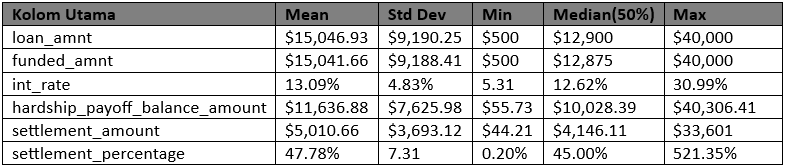

 **Statistik Numerik**

**Jumlah Pinjaman:** Median pinjaman yang disetujui sebesar,$12.9K, tetapi rata-rata 15K menunjukkan adanya beberapa pinjaman besar yang menaikkan rata-rata.

**Tingkat Bunga:** Median tingkat bunga 12.62%, dengan maksimum hingga 30.99%, menandakan beberapa peminjam berisiko tinggi.

**Settlement Amount & Percentage:**

* **Settlement Percentage** (persentase penyelesaian utang) cukup tinggi pada median 45%, tetapi terdapat beberapa kasus ekstrem dengan persentase lebih dari 500%, yang mungkin menunjukkan pelunasan yang tidak lazim atau restrukturisasi utang.





---



 **2. Statistik Kategorikal**

Beberapa kolom kategorikal kunci menampilkan distribusi unik dan frekuensi tertinggi:

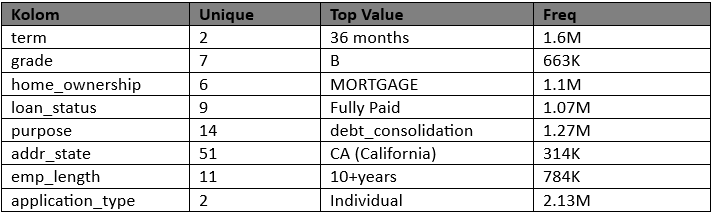

**Statistik Kategorikal**

**Durasi Pinjaman (term):** Mayoritas pinjaman memiliki jangka waktu 36 bulan, yang mencerminkan preferensi untuk jangka menengah.

**Grade Kredit:** Grade B dan C mendominasi, yang sesuai dengan profil peminjam berisiko menengah.

**Kepemilikan Rumah:** Mortgage adalah status paling umum, menunjukkan bahwa mayoritas peminjam memiliki kewajiban finansial lain.

**Tujuan Pinjaman:** Debt consolidation (konsolidasi utang) adalah alasan utama untuk pinjaman, dengan 1.27M kasus.

**Lokasi:** California (CA) adalah negara bagian dengan aplikasi terbanyak, mungkin karena ukuran populasi dan aktivitas ekonomi.

**Lama Bekerja:** Mayoritas peminjam memiliki pengalaman kerja 10+ tahun, menandakan stabilitas pekerjaan yang baik.

In [ ]:
analisis_deskriptif(rejected, "Rejected Loans")


Analisis Deskriptif - Rejected Loans

Statistik Numerik:
                        count          mean           std  min     25%  \
amount_requested  27648741.0  13133.240309  15009.636324  0.0  4800.0   
risk_score         9151111.0    628.172090     89.936793  0.0   591.0   
policy_code       27647823.0      0.006375      0.112737  0.0     0.0   

                      50%      75%        max  
amount_requested  10000.0  20000.0  1400000.0  
risk_score          637.0    675.0      990.0  
policy_code           0.0      0.0        2.0  

Statistik Kategorikal:
                          count  unique                 top      freq
application_date      27648741    4238          2018-12-04     42112
loan_title            27647436   73927  Debt consolidation   6418016
debt-to-income_ratio  27648741  126145                100%   1362556
zip_code              27648448    1001               112xx    267102
state                 27648719      51                  CA   3242169
employment_length

**1. Statistik Numerik**

Dataset ini mencakup atribut numerik utama yang memberikan gambaran jumlah pinjaman yang diminta dan risiko peminjam.

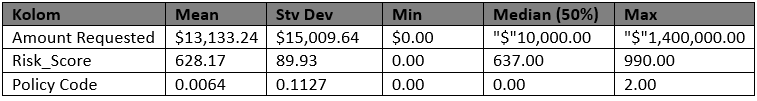

**Statistik Numerik**

**Amount Requested**:

* Median pinjaman sebesar $10K, sementara rata-rata 13.1K, menunjukkan adanya beberapa permintaan pinjaman besar yang mendorong rata-rata naik.

* $1.4M sebagai nilai maksimum mungkin merupakan outlier yang signifikan atau salah input.

**Risk Score:**

* Median 637 mendekati rata-rata 628, yang berarti distribusi risiko relatif normal.

* Skor 0 menunjukkan bahwa ada data yang mungkin kosong atau tidak valid.

**Policy Code:**

Median 0 menunjukkan sebagian besar data mengikuti kebijakan dasar, dengan beberapa kasus langka dengan kode 1 atau 2.



---



**2. Statistik Kategorikal**

Beberapa atribut kategorikal kunci menunjukkan distribusi unik yang relevan dengan profil peminjam dan alasan penolakan.

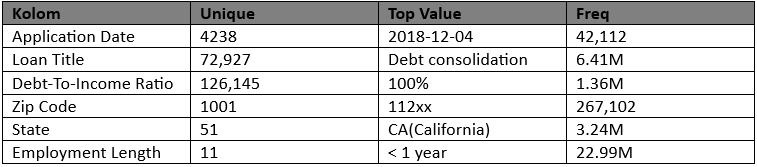

 **Statistik Kategorikal:**

**Loan Title:**

Debt consolidation (Konsolidasi Utang) mendominasi dengan 6.41M aplikasi yang ditolak, menunjukkan tingginya permintaan untuk melunasi utang lain.

**Debt-To-Income Ratio (DTI):**

100% sebagai top value menunjukkan banyak peminjam yang seluruh pendapatannya sudah digunakan untuk membayar utang, menandakan risiko keuangan yang tinggi.

**State:**

California (CA) memiliki jumlah aplikasi tertinggi yang ditolak, dengan 3.24M kasus, konsisten dengan populasi dan aktivitas ekonomi yang besar.

**Employment Length:**

Sebagian besar peminjam memiliki pengalaman kerja < 1 tahun, menandakan stabilitas pekerjaan rendah sebagai salah satu alasan penolakan.



# Visualisasi Missing Values pada Data Accepted dan Rejected

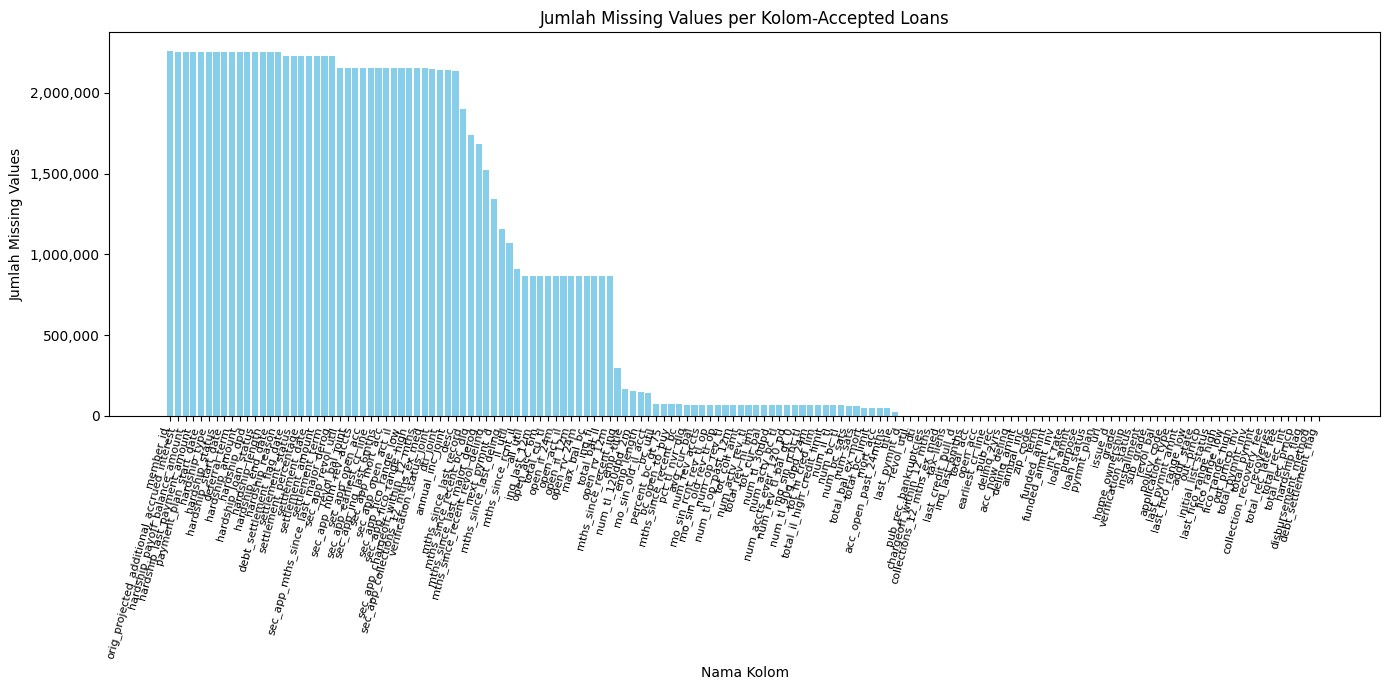

In [ ]:
missing_values = accepted.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(14, 7))
bars = plt.bar(missing_values.index, missing_values.values, color='skyblue')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Jumlah Missing Values per Kolom-Accepted Loans")
plt.xlabel("Nama Kolom")
plt.ylabel("Jumlah Missing Values")
plt.xticks(rotation=75, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

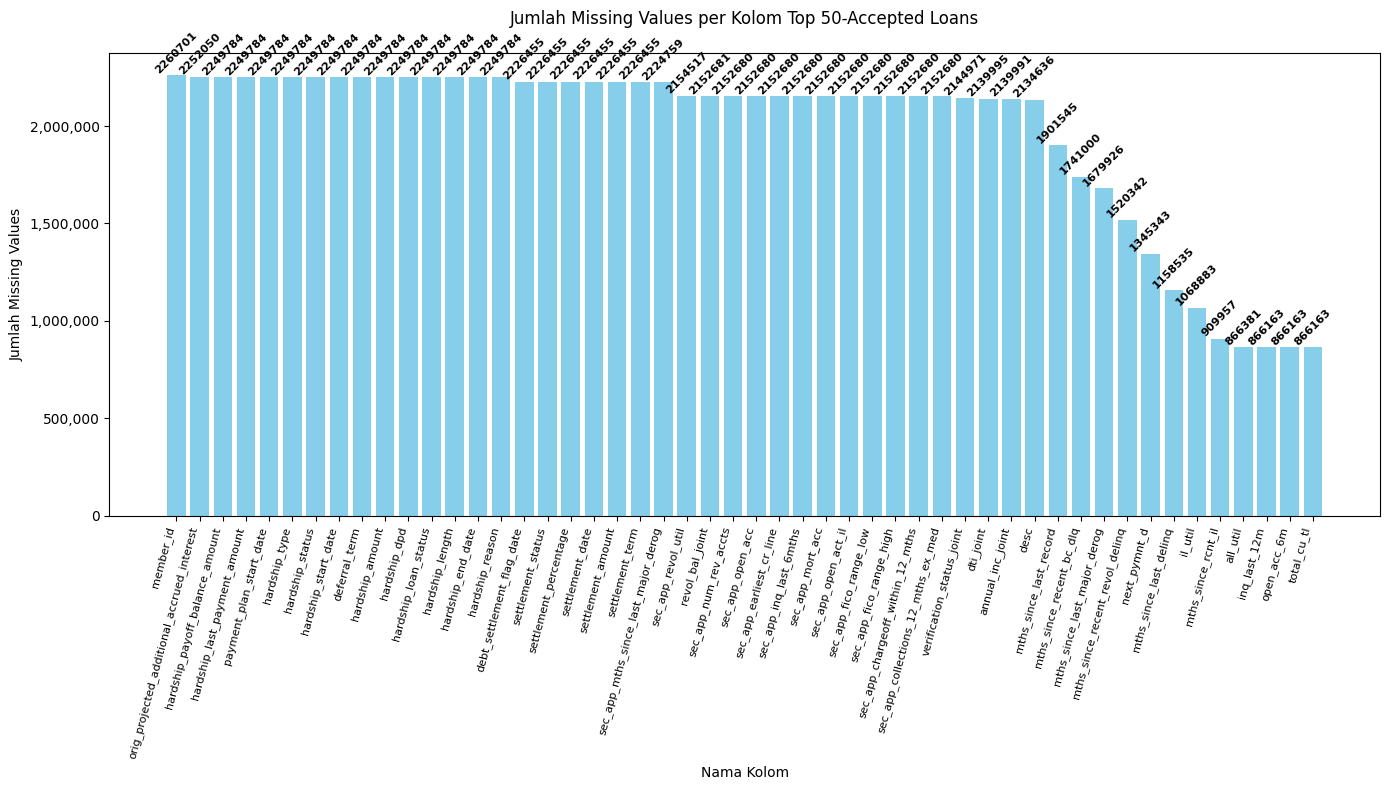

In [ ]:
missing_values = accepted.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)


top_n = 50

if len(missing_values) > top_n:
    missing_values = missing_values.head(top_n)

plt.figure(figsize=(14, 8))
bars = plt.bar(missing_values.index, missing_values.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=8, fontweight='bold', rotation=45)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title(f"Jumlah Missing Values per Kolom Top {top_n}-Accepted Loans\n")
plt.xlabel("Nama Kolom")
plt.ylabel("Jumlah Missing Values")

plt.xticks(rotation=75, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

Grafik ini menampilkan jumlah missing values (nilai yang hilang) pada 50 kolom teratas dalam dataset accepted. Berikut adalah beberapa poin penting yang dapat diambil dari visualisasi tersebut:

Kolom dengan Missing Values Tinggi:

Sebagian besar kolom di grafik ini memiliki lebih dari 1 juta missing values, dengan beberapa kolom mencapai lebih dari 2 juta missing values.

Ini menunjukkan bahwa ada ketidakseimbangan data yang signifikan pada kolom-kolom tertentu.

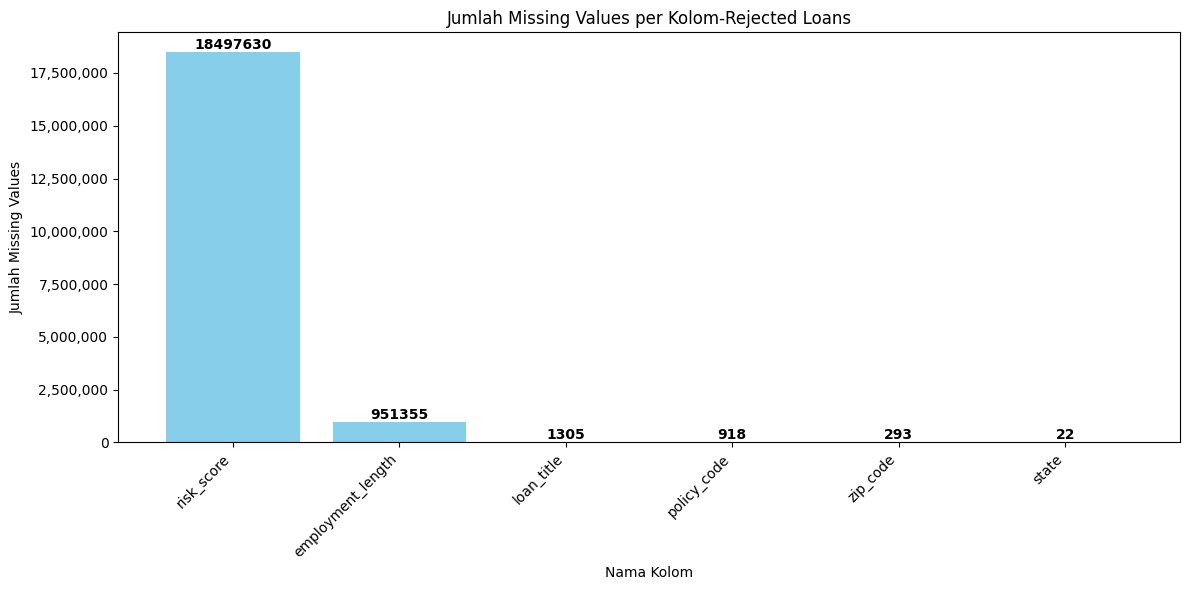

In [ ]:
missing_values = rejected.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(missing_values.index, missing_values.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Jumlah Missing Values per Kolom-Rejected Loans")
plt.xlabel("Nama Kolom")
plt.ylabel("Jumlah Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualisasi di atas menunjukkan distribusi missing values pada sampel dataset Rejected Loans. Warna hitam merepresentasikan data yang tersedia, sementara warna terang menandakan nilai yang hilang.

Terlihat bahwa Risk_Score memiliki jumlah missing values yang signifikan, kemungkinan karena tidak semua pelamar yang ditolak menerima penilaian risiko. Employment Length, Debt-To-Income Ratio, dan Zip Code juga menunjukkan missing values, meski dalam jumlah yang lebih kecil, mungkin akibat data sensitif atau informasi yang tidak lengkap.

Sebaliknya, variabel seperti Amount Requested, Application Date, dan Loan Title hampir sepenuhnya terisi, menandakan bahwa informasi dasar aplikasi umumnya dikumpulkan dengan baik.

Pola ini menegaskan pentingnya penanganan missing values sesuai konteks. Variabel dengan missing tinggi mungkin memerlukan imputasi berbasis kategori atau eksklusi, sementara yang lain dapat diatasi dengan metode statistik sederhana. Memahami distribusi missing values membantu memastikan kualitas analisis dan keakuratan model yang dibangun.

# Distribusi Fitur Penting Accepted Loans

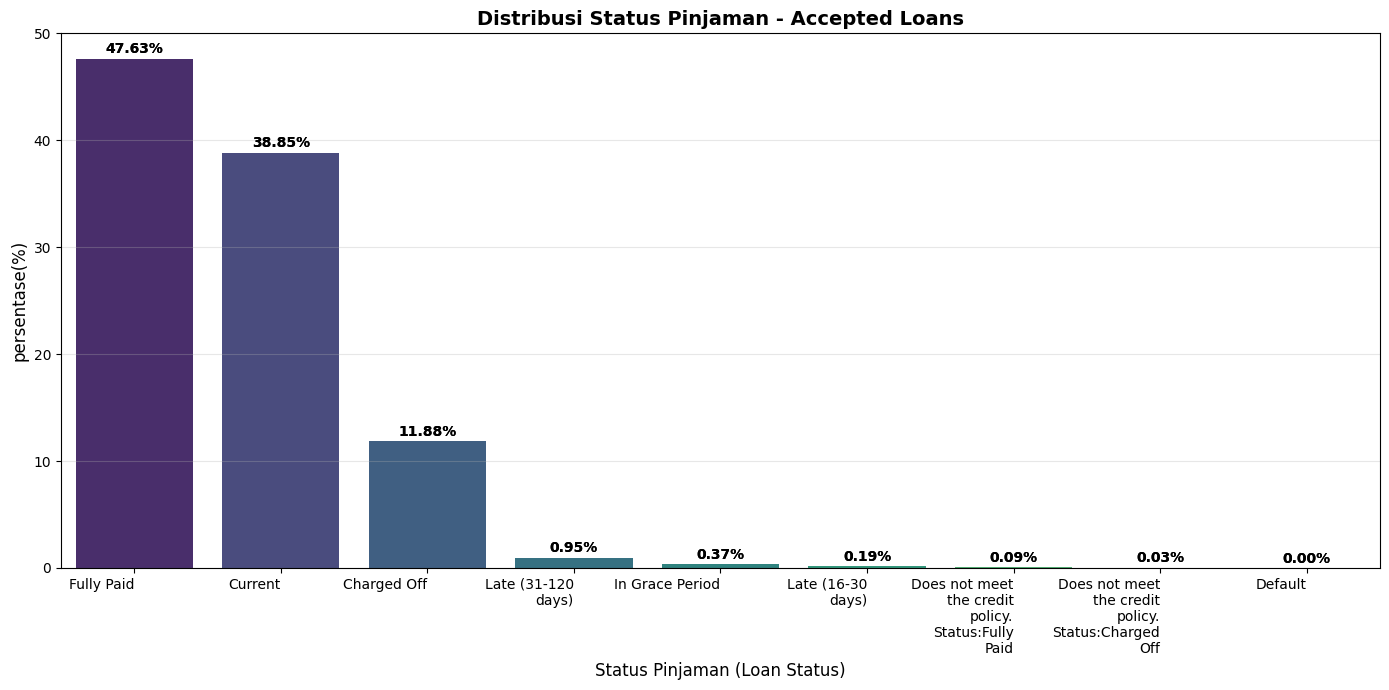

In [ ]:
accepted['loan_status'] = accepted['loan_status'].str.wrap(15)
status_counts = accepted['loan_status'].value_counts()
total = status_counts.sum()
percentages = (status_counts / total) * 100

plt.figure(figsize=(14, 7))
sns.barplot(x=status_counts.index, y=percentages, palette='viridis', hue=status_counts.index, legend=False)

for i, percent in enumerate(percentages):
    plt.text(i, percent + 0.5, f"{percent:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.title('Distribusi Status Pinjaman - Accepted Loans', fontsize=14, fontweight='bold')
plt.xlabel('Status Pinjaman (Loan Status)', fontsize=12)
plt.ylabel('persentase Peminjam', fontsize=12)

for i, percent in enumerate(percentages):
    plt.text(i, percent + 0.5, f"{percent:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.title('Distribusi Status Pinjaman - Accepted Loans', fontsize=14, fontweight='bold')
plt.xlabel('Status Pinjaman (Loan Status)', fontsize=12)
plt.ylabel('persentase(%)')
plt.xticks(ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Visualisasi di atas menampilkan distribusi status pinjaman dalam dataset Accepted Loans. Kategori Fully Paid dan Current mendominasi data, dengan jumlah masing-masing melebihi ratusan ribu hingga jutaan kasus. Ini menunjukkan bahwa sebagian besar peminjam berhasil melunasi pinjaman mereka atau sedang aktif dalam proses pembayaran.

Charged Off (pinjaman yang dianggap tidak tertagih) memiliki jumlah yang jauh lebih kecil, tetapi tetap signifikan karena merepresentasikan kerugian bagi pemberi pinjaman. In Grace Period (masa tenggang) dan kategori keterlambatan seperti Late (31-120 days) dan Late (16-30 days) menunjukkan bahwa sebagian kecil peminjam mengalami kesulitan pembayaran, meski mungkin masih bisa pulih.

Kehadiran kategori Default (gagal bayar) dan status yang tidak memenuhi kebijakan kredit mengindikasikan penolakan berdasarkan kelayakan atau ketidakpatuhan terhadap kebijakan internal. Meskipun frekuensinya kecil, kategori ini penting untuk analisis risiko.

Polanya mencerminkan stabilitas relatif dalam portofolio pinjaman, tetapi juga menekankan perlunya analisis risiko lebih dalam pada kategori non-lancar untuk mengelola potensi kerugian.

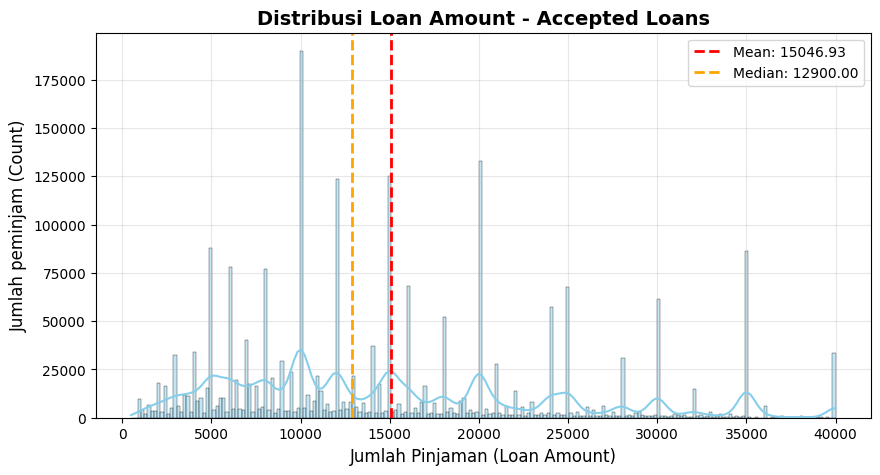

In [ ]:
feature = 'loan_amnt'

plt.figure(figsize=(10, 5))
sns.histplot(accepted[feature], kde=True, color='skyblue')

mean_val = accepted[feature].mean()
median_val = accepted[feature].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

plt.title(f'Distribusi Loan Amount - Accepted Loans', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Pinjaman (Loan Amount)', fontsize=12)
plt.ylabel('Jumlah peminjam (Count)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

Grafik di atas menunjukkan distribusi jumlah pinjaman (loan amount) pada pinjaman yang disetujui (Accepted Loans). Pola distribusi ini tampak memiliki beberapa puncak dengan kepadatan tertinggi berada di sekitar angka 10.000 hingga 20.000. Ini menunjukkan bahwa sebagian besar peminjam menerima pinjaman dalam kisaran tersebut, yang kemungkinan mencerminkan jumlah yang paling banyak diminta atau disetujui oleh lembaga keuangan.

Distribusi juga menampilkan beberapa puncak sekunder pada nilai pinjaman yang lebih tinggi, seperti sekitar 30.000 hingga 35.000, meskipun jumlah peminjam dalam kisaran ini relatif lebih rendah. Pola yang berulang pada kelipatan tertentu bisa menandakan bahwa jumlah pinjaman mungkin distandarisasi atau terkait dengan kategori produk pinjaman tertentu.

Selain itu, distribusi yang menyebar hingga 40.000 menunjukkan bahwa ada beberapa kasus dengan jumlah pinjaman yang besar, namun dengan frekuensi yang lebih jarang. Informasi ini berguna bagi analisis risiko, perancangan produk pinjaman, dan strategi penentuan plafon pinjaman yang sesuai dengan profil mayoritas peminjam.

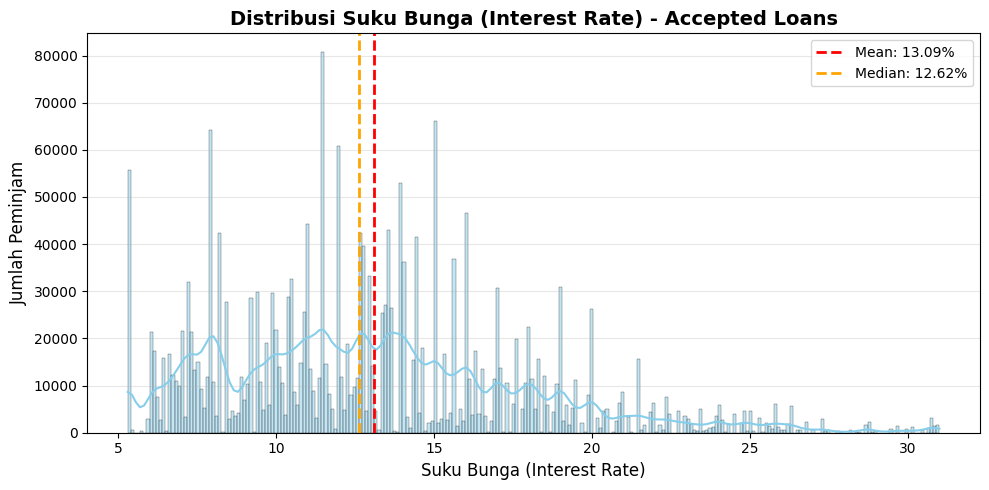

In [ ]:
feature = 'int_rate'

plt.figure(figsize=(10, 5))
sns.histplot(accepted[feature], kde=True, color='skyblue')

mean_val = accepted[feature].mean()
median_val = accepted[feature].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}%')
plt.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}%')

plt.title('Distribusi Suku Bunga (Interest Rate) - Accepted Loans', fontsize=14, fontweight='bold')
plt.xlabel('Suku Bunga (Interest Rate)', fontsize=12)
plt.ylabel('Jumlah Peminjam', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Visualisasi di atas menampilkan distribusi suku bunga (int_rate) pada pinjaman yang disetujui (Accepted Loans). Rentang suku bunga berkisar dari 5% hingga sekitar 30%, dengan konsentrasi terbesar berada pada kisaran 10% hingga 15%. Hal ini menunjukkan bahwa mayoritas pinjaman yang disetujui diberikan dengan suku bunga menengah, mencerminkan tingkat risiko yang dianggap wajar oleh pemberi pinjaman.

Terdapat pola penurunan jumlah pinjaman seiring dengan meningkatnya suku bunga. Suku bunga di atas 20% jauh lebih jarang, yang mungkin mengindikasikan tingginya risiko gagal bayar atau rendahnya minat peminjam pada tingkat bunga yang tinggi.

Plot kepadatan kernel (KDE) yang menyertainya menunjukkan puncak yang jelas pada kisaran 10% hingga 15%, menandakan bahwa kisaran ini merupakan titik paling umum dalam distribusi. Informasi ini berguna dalam mengevaluasi profil risiko dan menentukan strategi harga yang optimal bagi pemberi pinjaman.

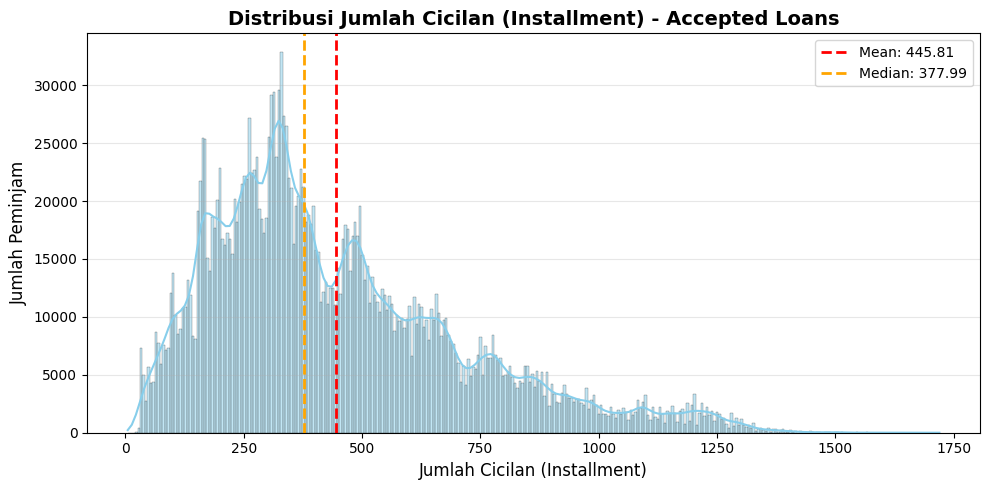

In [ ]:
feature = 'installment'

plt.figure(figsize=(10, 5))
sns.histplot(accepted[feature], kde=True, color='skyblue')

mean_val = accepted[feature].mean()
median_val = accepted[feature].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

plt.title('Distribusi Jumlah Cicilan (Installment) - Accepted Loans', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Cicilan (Installment)', fontsize=12)
plt.ylabel('Jumlah Peminjam', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan distribusi jumlah cicilan (installment) pada pinjaman yang disetujui (Accepted Loans). Pola distribusi cenderung asimetris dengan puncak tertinggi berada pada kisaran 200 hingga 400. Hal ini menunjukkan bahwa mayoritas peminjam membayar cicilan bulanan dalam rentang tersebut.



Terdapat kecenderungan penurunan jumlah peminjam seiring dengan meningkatnya besaran cicilan, di mana hanya sedikit peminjam yang memiliki cicilan bulanan di atas 1000. Ini mungkin mengindikasikan bahwa pinjaman dengan cicilan tinggi diberikan kepada sejumlah kecil peminjam yang mungkin memiliki profil keuangan yang lebih kuat.

Plot kepadatan kernel (KDE) mempertegas konsentrasi utama pada kisaran cicilan menengah. Informasi ini berguna untuk memahami pola pembayaran bulanan yang umum, serta dapat membantu lembaga keuangan dalam merancang struktur pinjaman yang sesuai dengan kemampuan bayar mayoritas peminjam.

# Distribusi Fitur Penting Rejected Loans

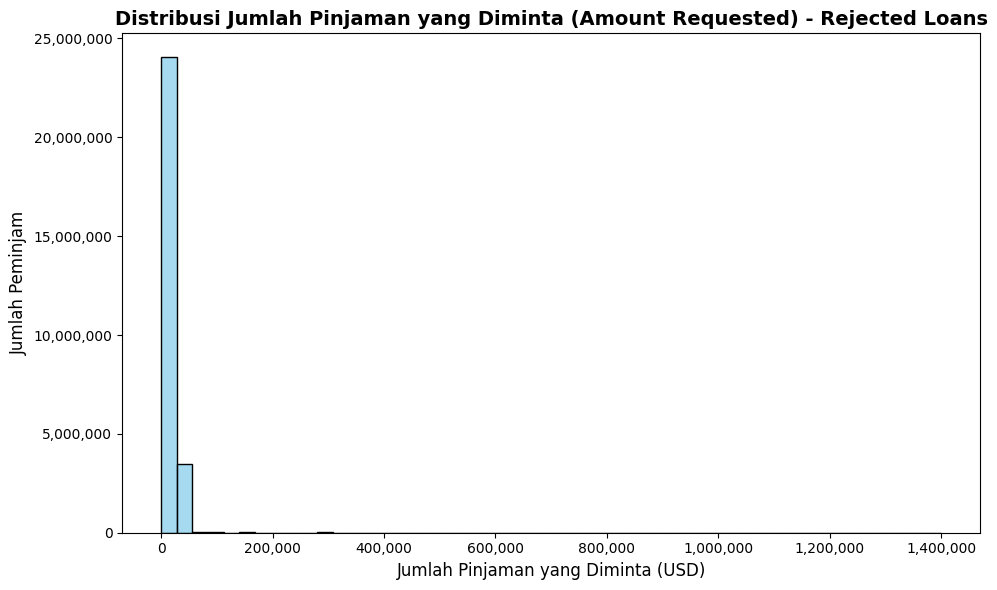

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(rejected['amount_requested'], bins=50, kde=False, color='skyblue')

plt.title('Distribusi Jumlah Pinjaman yang Diminta (Amount Requested) - Rejected Loans', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Pinjaman yang Diminta (USD)', fontsize=12)
plt.ylabel('Jumlah Peminjam', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.tight_layout()
plt.show()


Grafik di atas menunjukkan distribusi jumlah pinjaman yang diminta (amount_requested) untuk aplikasi pinjaman yang ditolak (Rejected Loans). Pola distribusi ini memperlihatkan konsentrasi data yang sangat tinggi di dekat nilai pinjaman yang relatif kecil, dengan mayoritas permintaan terkumpul di sekitar angka rendah dalam skala ratusan hingga ribuan dolar. Hal ini dapat mengindikasikan bahwa sebagian besar pemohon yang ditolak meminta jumlah pinjaman kecil hingga menengah.

Selain itu, rentang sumbu x yang membentang hingga 1,4 juta menunjukkan bahwa terdapat beberapa aplikasi dengan jumlah pinjaman yang sangat besar. Namun, frekuensinya sangat rendah, terlihat dari distribusi yang nyaris mendekati nol di luar kisaran rendah. Ini mungkin mengindikasikan bahwa pengajuan dalam jumlah yang sangat tinggi cenderung tidak disetujui karena profil risiko atau kebijakan kredit yang ketat.

Distribusi yang sangat terkonsentrasi di sisi kiri grafik dengan ekor yang panjang (right-skewed) mencerminkan adanya perbedaan besar antara jumlah yang diminta oleh sebagian besar pemohon dan jumlah yang diminta oleh segelintir pemohon yang mengajukan pinjaman dalam jumlah sangat besar. Analisis ini bisa membantu lembaga keuangan dalam memahami pola permintaan pinjaman yang ditolak dan mengidentifikasi kemungkinan penyebab penolakan terkait dengan jumlah yang diminta.

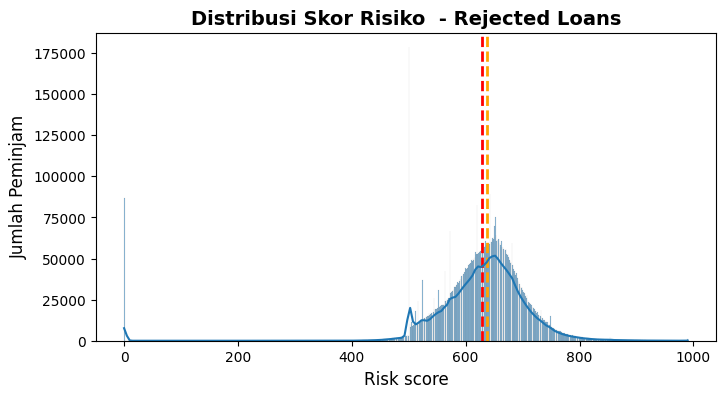

In [ ]:
feature = 'risk_score'
plt.figure(figsize=(8, 4))

mean_val = rejected[feature].mean()
median_val = rejected[feature].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

plt.title('Distribusi Skor Risiko  - Rejected Loans', fontsize=14, fontweight='bold')
plt.xlabel('Risk score', fontsize=12)
plt.ylabel('Jumlah Peminjam', fontsize=12)

sns.histplot(rejected[feature], kde=True)
plt.show()

Berdasarkan visualisasi distribusi skor risiko untuk pinjaman yang ditolak, tampak bahwa mayoritas aplikasi yang ditolak memiliki skor risiko dalam rentang 500 hingga 800. Konsentrasi data terlihat paling padat di sekitar skor 650, menandakan bahwa meskipun pemohon memiliki skor risiko yang tidak ekstrem, mereka tetap berisiko tinggi untuk ditolak. Ini bisa mengindikasikan bahwa faktor-faktor lain, seperti pendapatan, riwayat kredit, atau kondisi ekonomi, turut berperan dalam keputusan penolakan.

Di sisi lain, skor risiko di atas 800 tampaknya lebih jarang ditemui dalam data penolakan. Hal ini mungkin karena pemohon dengan skor risiko tinggi cenderung lebih selektif dalam mengajukan pinjaman atau karena mereka sudah dianggap terlalu berisiko sehingga aplikasi mereka langsung ditolak tanpa banyak pertimbangan. Sementara itu, skor risiko di bawah 500 juga menunjukkan jumlah penolakan yang relatif sedikit, yang mungkin disebabkan oleh rendahnya jumlah pemohon dengan skor sedemikian atau karena alasan penolakan yang lebih kompleks.

Visualisasi ini memberikan gambaran yang menarik tentang peran skor risiko dalam proses penolakan pinjaman. Dengan memahami pola ini, pihak pemberi pinjaman dapat mengevaluasi kembali kriteria penilaian mereka dan mempertimbangkan faktor-faktor tambahan yang mungkin memengaruhi keputusan kredit.

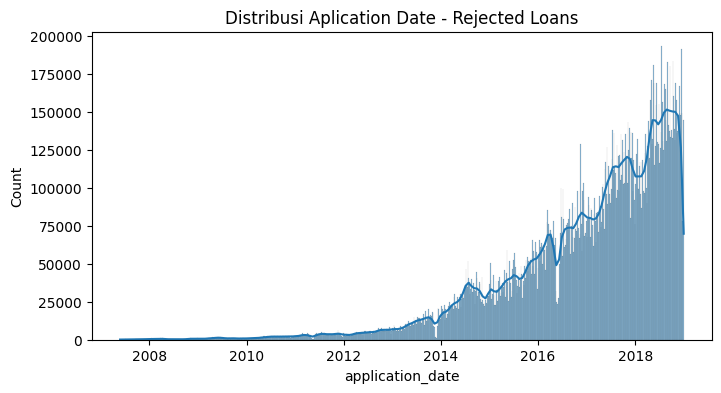

In [ ]:
rejected['application_date'] = pd.to_datetime(rejected['application_date'], errors='coerce')
feature = 'application_date'
plt.figure(figsize=(8, 4))
sns.histplot(rejected[feature], kde=True)
plt.title(f'Distribusi Aplication Date - Rejected Loans')
plt.show()

Berdasarkan grafik distribusi tanggal aplikasi untuk pinjaman yang ditolak, terlihat bahwa jumlah aplikasi pinjaman yang ditolak mengalami fluktuasi dari tahun 2008 hingga 2018. Pada tahun 2008, jumlah aplikasi yang ditolak relatif rendah, namun mulai meningkat secara signifikan pada tahun 2012 dan mencapai puncaknya sekitar tahun 2014. Setelah tahun 2014, terjadi penurunan yang cukup tajam dalam jumlah aplikasi yang ditolak, meskipun tetap ada fluktuasi hingga tahun 2018.

Peningkatan jumlah aplikasi yang ditolak pada periode 2012-2014 mungkin disebabkan oleh berbagai faktor, seperti perubahan kebijakan kredit, kondisi ekonomi yang tidak stabil, atau peningkatan jumlah aplikasi pinjaman secara keseluruhan. Penurunan setelah tahun 2014 bisa mengindikasikan adanya perbaikan dalam proses seleksi kredit atau perubahan dalam kebijakan pemberian pinjaman yang lebih ketat.

Grafik ini memberikan wawasan penting tentang tren penolakan pinjaman selama satu dekade, yang dapat digunakan untuk analisis lebih lanjut mengenai faktor-faktor yang memengaruhi keputusan pemberian pinjaman dan bagaimana kebijakan kredit dapat disesuaikan untuk mengurangi tingkat penolakan di masa depan.

# **2. Penanganan Data yang Hilang dan Pembersihan Data untuk Dataset**

*Langkah :*
1.   Identifikasi Data Hilang
2.   Penghapusan Data
3.   Imputasi Data
4.   Penghapusan Redundansi  
5.   Optimasi Data
6.   Validasi Akhir

# **2.1 Accepted**

# **1. Periksa Missing Values**

Kode ini digunakan untuk mengecek jumlah dan persentase nilai yang hilang dalam setiap kolom pada DataFrame pandas. Pertama, kode menghitung jumlah nilai yang hilang dengan mengecek setiap kolom menggunakan isnull().sum(). Selanjutnya, persentase nilai yang hilang dihitung dengan isnull().mean() * 100, lalu dibulatkan dua angka di belakang koma. Hasil ini kemudian dikemas dalam sebuah DataFrame ringkasan yang berisi jumlah dan persentase nilai yang hilang. Fungsi ini juga menampilkan hasilnya di konsol dan mengembalikan DataFrame ringkasan tersebut agar dapat digunakan untuk analisis lebih lanjut.

In [ ]:
def missing_val(df):
    missing_count = df.isnull().sum()
    print("Missing values per column:")
    print(missing_count)

    # Calculate percentage of missing values
    missing_percentage = (df.isnull().mean() * 100).round(2)
    print("\nPercentage of missing values per column (%):")
    print(missing_percentage)

    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Missing_Count': missing_count,
        'Missing_Percentage (%)': missing_percentage
    })
    print("\nMissing Values Summary:")
    print(missing_summary)
    return missing_summary

In [ ]:
missing_summary = missing_val(accepted)

Missing values per column:
id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

Percentage of missing values per column (%):
id                         0.00
member_id                100.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
                          ...  
settlement_status         98.49
settlement_date           98.49
settlement_amount         98.49
settlement_percentage     98.49
settlement_term           98.49
Length: 151, dtype: float64

Missing Values Summary:
                       Missing_Count  Missing_Percentage (%)
id                                 0                    0.00
member_id  

In [ ]:
with pd.option_context('display.max_rows', 1000, 'display.width', 1000):
    print(missing_summary)

                                            Missing_Count  Missing_Percentage (%)
id                                                      0                    0.00
member_id                                         2260701                  100.00
loan_amnt                                              33                    0.00
funded_amnt                                            33                    0.00
funded_amnt_inv                                        33                    0.00
term                                                   33                    0.00
int_rate                                               33                    0.00
installment                                            33                    0.00
grade                                                  33                    0.00
sub_grade                                              33                    0.00
emp_title                                          167002                    7.39
emp_length      

**Kolom dengan missing values 100%**
*   member_id: Semua datanya hilang, jadi kolom ini mungkin tidak berguna untuk analisis.

**Kolom dengan missing values sangat tinggi (>90%)**
*   desc, annual_inc_joint, dti_joint, verification_status_joint, revol_bal_joint, dan kolom terkait sec_app_*.
*   Data ini mungkin tidak relevan atau hanya diisi untuk sebagian kecil peminjam.

**Kolom dengan missing values cukup signifikan (30-80%)**
*   mths_since_last_delinq, mths_since_last_record, next_pymnt_d, mths_since_last_major_derog, dll.
*   Kolom ini terkait dengan riwayat kredit dan keterlambatan pembayaran.

**Kolom dengan missing values kecil (<10%)**
*   emp_title, emp_length, mths_since_recent_inq, mo_sin_old_il_acct, dll.
*   Data ini mungkin masih bisa dipertahankan dengan imputasi atau pembersihan.

Selanjutnya, di sini, kita mengecek kolom-kolom yang memiliki nilai null dalam jumlah mayoritas, sehingga membuat kolom tersebut menjadi kurang relevan dan berpotensi membebani dataset.

In [ ]:
high_missing = missing_summary[missing_summary['Missing_Percentage (%)'] >= 51]
high_missing

Missing_Count  \
member_id                                         2260701   
desc                                              2134636   
mths_since_last_delinq                            1158535   
mths_since_last_record                            1901545   
next_pymnt_d                                      1345343   
mths_since_last_major_derog                       1679926   
annual_inc_joint                                  2139991   
dti_joint                                         2139995   
verification_status_joint                         2144971   
mths_since_recent_bc_dlq                          1741000   
mths_since_recent_revol_delinq                    1520342   
revol_bal_joint                                   2152681   
sec_app_fico_range_low                            2152680   
sec_app_fico_range_high                           2152680   
sec_app_earliest_cr_line                          2152680   
sec_app_inq_last_6mths                            2152680   
sec_app_mort_acc                                  2152680   
sec_app_open_acc                                  2152680   
sec_app_revol_util                                2154517   
sec_app_open_act_il                               2152680   
sec_app_num_rev_accts                             2152680   
sec_app_chargeoff_within_12_mths                  2152680   
sec_app_collections_12_mths_ex_med                2152680   
sec_app_mths_since_last_major_derog               2224759   
hardship_type                                     2249784   
hardship_reason                                   2249784   
hardship_status                                   2249784   
deferral_term                                     2249784   
hardship_amount                                   2249784   
hardship_start_date                               2249784   
hardship_end_date                                 2249784   
payment_plan_start_date                           2249784   
hardship_length                                   2249784   
hardship_dpd                                      2249784   
hardship_loan_status                              2249784   
orig_projected_additional_accrued_interest        2252050   
hardship_payoff_balance_amount                    2249784   
hardship_last_payment_amount                      2249784   
debt_settlement_flag_date                         2226455   
settlement_status                                 2226455   
settlement_date                                   2226455   
settlement_amount                                 2226455   
settlement_percentage                             2226455   
settlement_term                                   2226455   

                                            Missing_Percentage (%)  
member_id                                                   100.00  
desc                                                         94.42  
mths_since_last_delinq                                       51.25  
mths_since_last_record                                       84.11  
next_pymnt_d                                                 59.51  
mths_since_last_major_derog                                  74.31  
annual_inc_joint                                             94.66  
dti_joint                                                    94.66  
verification_status_joint                                    94.88  
mths_since_recent_bc_dlq                                     77.01  
mths_since_recent_revol_delinq                               67.25  
revol_bal_joint                                              95.22  
sec_app_fico_range_low                                       95.22  
sec_app_fico_range_high                                      95.22  
sec_app_earliest_cr_line                                     95.22  
sec_app_inq_last_6mths                                       95.22  
sec_app_mort_acc                                             95.22  
sec_app_open_acc                                        

Kode di bawah digunakan untuk menyaring kolom-kolom dalam dataset berdasarkan persentase nilai yang hilang (missing values). Bagian pertama dari kode tersebut memilih kolom yang memiliki nilai hilang lebih dari 0% tetapi tidak lebih dari 51%. Tujuannya adalah untuk mengidentifikasi kolom yang masih memiliki cukup banyak data untuk dianalisis, meskipun terdapat sejumlah missing values yang mungkin perlu ditangani. Sementara itu, bagian kedua (yang masih dikomentari) menyaring kolom dengan missing values tidak lebih dari 10%. Jika bagian ini digunakan, maka fokusnya adalah pada kolom-kolom yang sebagian besar datanya masih lengkap, sehingga bisa lebih mudah diolah tanpa perlu banyak imputasi atau penghapusan data.

In [ ]:
filtered_summary = missing_summary[
    (missing_summary['Missing_Percentage (%)'] > 0) &
    (missing_summary['Missing_Percentage (%)'] <= 51)
]

# filtered_summary= missing_summary[missing_summary['Missing_Percentage (%)'] <= 10]

filtered_summary

Missing_Count  Missing_Percentage (%)
emp_title                          167002                    7.39
emp_length                         146940                    6.50
title                               23359                    1.03
dti                                  1744                    0.08
revol_util                           1835                    0.08
last_pymnt_d                         2460                    0.11
collections_12_mths_ex_med            178                    0.01
tot_coll_amt                        70309                    3.11
tot_cur_bal                         70309                    3.11
open_acc_6m                        866163                   38.31
open_act_il                        866162                   38.31
open_il_12m                        866162                   38.31
open_il_24m                        866162                   38.31
mths_since_rcnt_il                 909957                   40.25
total_bal_il                       866162                   38.31
il_util                           1068883                   47.28
open_rv_12m                        866162                   38.31
open_rv_24m                        866162                   38.31
max_bal_bc                         866162                   38.31
all_util                           866381                   38.32
total_rev_hi_lim                    70309                    3.11
inq_fi                             866162                   38.31
total_cu_tl                        866163                   38.31
inq_last_12m                       866163                   38.31
acc_open_past_24mths                50063                    2.21
avg_cur_bal                         70379                    3.11
bc_open_to_buy                      74968                    3.32
bc_util                             76104                    3.37
chargeoff_within_12_mths              178                    0.01
mo_sin_old_il_acct                 139104                    6.15
mo_sin_old_rev_tl_op                70310                    3.11
mo_sin_rcnt_rev_tl_op               70310                    3.11
mo_sin_rcnt_tl                      70309                    3.11
mort_acc                            50063                    2.21
mths_since_recent_bc                73445                    3.25
mths_since_recent_inq              295468                   13.07
num_accts_ever_120_pd               70309                    3.11
num_actv_bc_tl                      70309                    3.11
num_actv_rev_tl                     70309                    3.11
num_bc_sats                         58623                    2.59
num_bc_tl                           70309                    3.11
num_il_tl                           70309                    3.11
num_op_rev_tl                       70309                    3.11
num_rev_accts                       70310                    3.11
num_rev_tl_bal_gt_0                 70309                    3.11
num_sats                            58623                    2.59
num_tl_120dpd_2m                   153690                    6.80
num_tl_30dpd                        70309                    3.11
num_tl_90g_dpd_24m                  70309                    3.11
num_tl_op_past_12m                  70309                    3.11
pct_tl_nvr_dlq                      70464                    3.12
percent_bc_gt_75                    75412                    3.34
pub_rec_bankruptcies                 1398                    0.06
tax_liens                             138                    0.01
tot_hi_cred_lim                     70309                    3.11
total_bal_ex_mort                   50063                    2.21
total_bc_limit                      50063                    2.21
total_il_high_credit_limit          70309                    3.11

In [ ]:
high_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, member_id to settlement_term
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Missing_Count           44 non-null     int64  
 1   Missing_Percentage (%)  44 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0+ KB


Kolom-kolom yang memiliki nilai null dalam jumlah besar (≥51% dari total data pada kolom tersebut) sebaiknya dihapus, karena terlalu banyak missing values sehingga kurang relevan dan dapat membebani dataset.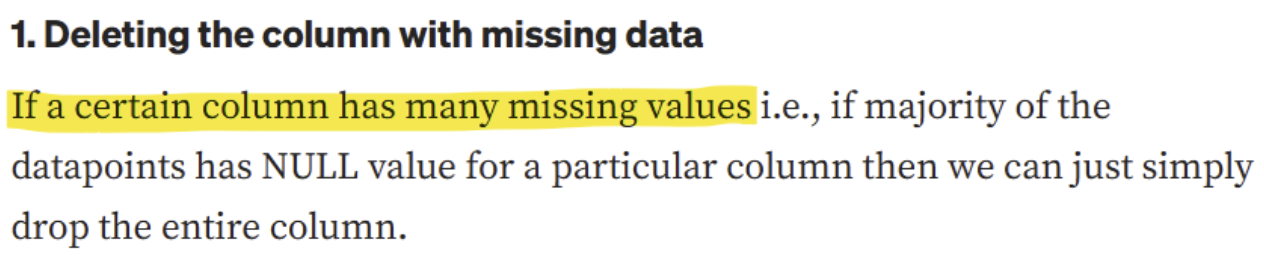

In [ ]:
# Get column names with ≥51% missing values
columns_to_drop = high_missing.index.tolist()

# Verify the list
print("Columns to drop:", columns_to_drop)

Columns to drop: ['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settl

In [ ]:
# Drop columns from the original DataFrame (df)
df_accepted_clean = accepted.drop(columns=columns_to_drop)

# Verify remaining columns
print("Remaining columns:", df_accepted_clean.columns.tolist())

Remaining columns: ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_r

In [ ]:
# Create a DataFrame of column names and dtypes
dtype_df = pd.DataFrame({
    'Column': df_accepted_clean.columns,
    'Data Type': df_accepted_clean.dtypes.values
})
print(dtype_df)

                         Column Data Type
0                            id    object
1                     loan_amnt   float64
2                   funded_amnt   float64
3               funded_amnt_inv   float64
4                          term    object
..                          ...       ...
102              total_bc_limit   float64
103  total_il_high_credit_limit   float64
104               hardship_flag    object
105         disbursement_method    object
106        debt_settlement_flag    object

[107 rows x 2 columns]


In [ ]:
# Temporarily set options for one output
with pd.option_context('display.max_rows', 1000, 'display.width', 1000):
    print(dtype_df)

                         Column Data Type
0                            id    object
1                     loan_amnt   float64
2                   funded_amnt   float64
3               funded_amnt_inv   float64
4                          term    object
5                      int_rate   float64
6                   installment   float64
7                         grade    object
8                     sub_grade    object
9                     emp_title    object
10                   emp_length    object
11               home_ownership    object
12                   annual_inc   float64
13          verification_status    object
14                      issue_d    object
15                  loan_status    object
16                   pymnt_plan    object
17                          url    object
18                      purpose    object
19                        title    object
20                     zip_code    object
21                   addr_state    object
22                          dti   

Proses ini bertujuan untuk melihat daftar kolom beserta tipe datanya dalam suatu DataFrame. Nama-nama kolom diambil dan dipasangkan dengan tipe data masing-masing, kemudian disusun dalam bentuk tabel yang lebih mudah dibaca. Hasilnya akan menunjukkan apakah suatu kolom berisi data numerik seperti integer atau float, atau data non-numerik seperti string (object). Informasi ini penting untuk memahami struktur dataset sebelum melakukan analisis atau pembersihan lebih lanjut.

In [ ]:
df_accepted_clean["title"]

0          Debt consolidation
1                    Business
2                         NaN
3          Debt consolidation
4              Major purchase
                  ...        
2260696                   NaN
2260697    Debt consolidation
2260698                   NaN
2260699                   NaN
2260700                   NaN
Name: title, Length: 2260701, dtype: object

In [ ]:
# 1. Identify object columns
object_cols = df_accepted_clean.select_dtypes(include=['object']).columns

# 2. Calculate missing stats
missing_stats = pd.DataFrame({
    'Missing_Count': df_accepted_clean[object_cols].isnull().sum(),
    'Missing_Percentage (%)': (df_accepted_clean[object_cols].isnull().mean() * 100).round(2)
})

# 3. Print sorted results
print("Missing values in object columns:")
print(missing_stats.sort_values('Missing_Percentage (%)', ascending=False))

# 4. Action: Fill missing values
# df[object_cols] = df[object_cols].fillna("Unknown")

Missing values in object columns:
                      Missing_Count  Missing_Percentage (%)
emp_title                    167002                    7.39
emp_length                   146940                    6.50
title                         23359                    1.03
last_pymnt_d                   2460                    0.11
sub_grade                        33                    0.00
grade                            33                    0.00
id                                0                    0.00
term                             33                    0.00
verification_status              33                    0.00
home_ownership                   33                    0.00
pymnt_plan                       33                    0.00
issue_d                          33                    0.00
url                              33                    0.00
purpose                          33                    0.00
zip_code                         34                    0.00
loan_s

Di sini dilakukan pengecekan terhadap data yang memiliki persentase missing values yang rendah untuk menilai dampaknya jika dihapus. Setelah dianalisis, ternyata penghapusan data tersebut hanya mempengaruhi sekitar 5% dari keseluruhan dataset. Dengan total data yang mencapai ratusan ribu hingga jutaan, dampak ini tergolong kecil, sehingga penghapusan data dengan missing values rendah dianggap tidak terlalu berisiko terhadap kualitas analisis secara keseluruhan.

In [ ]:
# Get columns where missing percentage < 10%
low_missing_cols = missing_summary[missing_summary['Missing_Percentage (%)'] < 5].index.tolist()
print("Columns with <10% missing values:", low_missing_cols)

Columns with <10% missing values: ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_

In [ ]:
# Create a boolean mask for rows with missing values in ANY low-missing column
rows_to_drop_mask = df_accepted_clean[low_missing_cols].isnull().any(axis=1)

# Count impacted rows
impacted_rows = rows_to_drop_mask.sum()
total_rows = len(df_accepted_clean)
print(f"Rows to drop: {impacted_rows} ({(impacted_rows / total_rows * 100):.2f}% of total)")

Rows to drop: 123629 (5.47% of total)


Hapus baris yang memiliki missing values dengan dampak rendah terhadap keseluruhan data.

In [ ]:
df_accepted_clean = df_accepted_clean.dropna(subset=low_missing_cols)
print(f"New DataFrame shape: {df_accepted_clean.shape}")

New DataFrame shape: (2137072, 107)


In [ ]:
missing_summary = missing_val(df_accepted_clean)

Missing values per column:
id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
debt_settlement_flag          0
Length: 107, dtype: int64

Percentage of missing values per column (%):
id                            0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
                             ... 
total_bc_limit                0.0
total_il_high_credit_limit    0.0
hardship_flag                 0.0
disbursement_method           0.0
debt_settlement_flag          0.0
Length: 107, dtype: float64

Missing Values Summary:
                            Missing_Count  Missing_Percentage (%)
id                                      0               

In [ ]:
filtered_summary= missing_summary[missing_summary['Missing_Percentage (%)'] > 0]

filtered_summary

Missing_Count  Missing_Percentage (%)
emp_title                     154722                    7.24
emp_length                    137175                    6.42
open_acc_6m                   786796                   36.82
open_act_il                   786796                   36.82
open_il_12m                   786796                   36.82
open_il_24m                   786796                   36.82
mths_since_rcnt_il            828882                   38.79
total_bal_il                  786796                   36.82
il_util                       982129                   45.96
open_rv_12m                   786796                   36.82
open_rv_24m                   786796                   36.82
max_bal_bc                    786796                   36.82
all_util                      786796                   36.82
inq_fi                        786796                   36.82
total_cu_tl                   786796                   36.82
inq_last_12m                  786796                   36.82
mo_sin_old_il_acct             66914                    3.13
mths_since_recent_inq         235739                   11.03
num_tl_120dpd_2m               81244                    3.80

Untuk kolom dengan missing values antara 5%-51%, terdapat banyak nilai yang identik. Oleh karena itu, perlu dilakukan evaluasi lebih lanjut untuk menentukan apakah seluruh kolom perlu dihapus atau cukup mempertahankan salah satu yang paling representatif.

<Axes: >

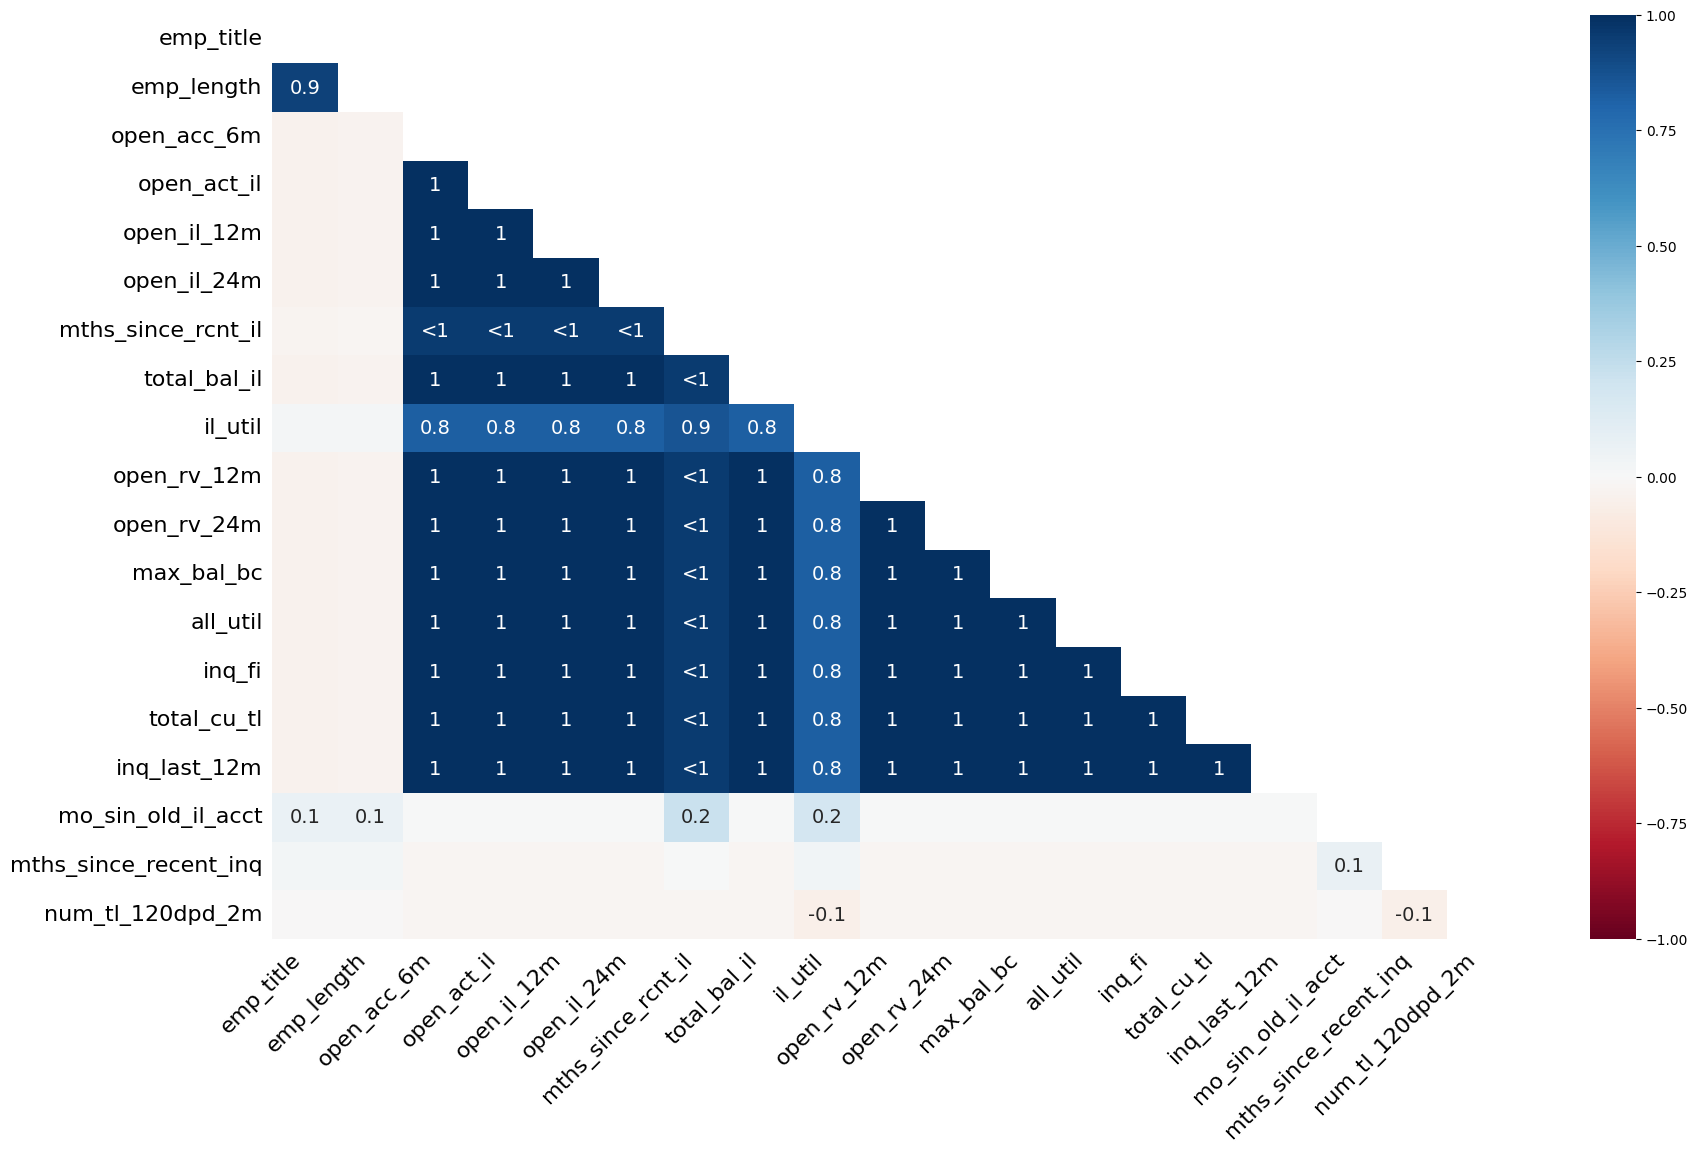

In [ ]:
# Visualize missing value patterns
msno.heatmap(df_accepted_clean)

Dapat dilihat bahwa banyak kolom memiliki nilai yang sama dengan kolom lainnya. Hal ini menunjukkan adanya dua kemungkinan korelasi terkait data yang hilang.

Sebagai contoh, jika suatu entri memiliki missing value di kolom open_acc_6m, maka kemungkinan besar kolom inq_last_12m juga memiliki missing value.

In [ ]:
overlap = df_accepted_clean[['open_acc_6m', 'inq_last_12m']].isnull().all(axis=1).sum()
print(f"Rows where both are missing: {overlap}")

Rows where both are missing: 786796


In [ ]:
df_accepted_clean = df_accepted_clean.drop(columns='open_acc_6m')

# **2. Periksa Redudansi Data**

Setelah menemukan korelasi antara kolom-kolom yang memiliki missing values, langkah selanjutnya adalah mengelompokkan kolom-kolom tersebut berdasarkan hubungan yang ditemukan. Setelah dikelompokkan, visualisasi dalam bentuk grafik akan dibuat untuk mempermudah analisis.

Sebagai contoh, jika kolom A memiliki korelasi dengan kolom B, dan kolom B juga memiliki korelasi dengan kolom C, maka ketiga kolom tersebut dapat dikelompokkan dalam satu grup. Hal ini menunjukkan adanya redundansi dalam data, sehingga dapat dipertimbangkan apakah semua kolom perlu dipertahankan atau cukup menyimpan salah satu yang paling representatif.

In [ ]:
# Step 1: Compute missingness correlation
missing_corr = df_accepted_clean.isnull().corr()

# Step 2: Find all column pairs with correlation = 1
perfect_corr_pairs = []
cols = missing_corr.columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if missing_corr.iloc[i, j] == 1:
            perfect_corr_pairs.append((cols[i], cols[j]))

# Step 3: Group redundant columns
G = nx.Graph()
G.add_edges_from(perfect_corr_pairs)
redundant_groups = list(nx.connected_components(G))

# Step 4: Print results
print("Redundant column groups (drop all but one per group):")
for group in redundant_groups:
    print(f"  - {list(group)}")

Redundant column groups (drop all but one per group):
  - ['inq_last_12m', 'open_il_24m', 'max_bal_bc', 'total_cu_tl', 'open_rv_12m', 'total_bal_il', 'open_il_12m', 'open_rv_24m', 'inq_fi', 'all_util', 'open_act_il']


In [ ]:
redundant_groups

[{'all_util',
  'inq_fi',
  'inq_last_12m',
  'max_bal_bc',
  'open_act_il',
  'open_il_12m',
  'open_il_24m',
  'open_rv_12m',
  'open_rv_24m',
  'total_bal_il',
  'total_cu_tl'}]

Kolom-kolom yang teridentifikasi sebagai redundan akan dihapus untuk meminimalkan beban dataset. Dengan menghapus kolom yang memiliki korelasi tinggi dengan kolom lainnya, dataset menjadi lebih efisien tanpa kehilangan informasi yang signifikan.

Hal ini juga membantu dalam meningkatkan performa pemrosesan data serta mengurangi kompleksitas analisis selanjutnya.

In [ ]:
columns_to_drop = []
for group in redundant_groups:
    group_list = list(group)
    keeper = group_list[0]  # Keep the first column in the group
    columns_to_drop.extend(group_list[1:])  # Drop the rest

# Step 5: Drop redundant columns
df_accepted_clean = df_accepted_clean.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
print(f"Remaining columns: {df_accepted_clean.columns.tolist()}")

Dropped columns: ['open_il_24m', 'max_bal_bc', 'total_cu_tl', 'open_rv_12m', 'total_bal_il', 'open_il_12m', 'open_rv_24m', 'inq_fi', 'all_util', 'open_act_il']
Remaining columns: ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 't

In [ ]:
missing_summary = missing_val(df_accepted_clean)

Missing values per column:
id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
debt_settlement_flag          0
Length: 96, dtype: int64

Percentage of missing values per column (%):
id                            0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
                             ... 
total_bc_limit                0.0
total_il_high_credit_limit    0.0
hardship_flag                 0.0
disbursement_method           0.0
debt_settlement_flag          0.0
Length: 96, dtype: float64

Missing Values Summary:
                            Missing_Count  Missing_Percentage (%)
id                                      0                 

In [ ]:
filtered_summary= missing_summary[missing_summary['Missing_Percentage (%)'] > 0]
filtered_summary

Missing_Count  Missing_Percentage (%)
emp_title                     154722                    7.24
emp_length                    137175                    6.42
mths_since_rcnt_il            828882                   38.79
il_util                       982129                   45.96
inq_last_12m                  786796                   36.82
mo_sin_old_il_acct             66914                    3.13
mths_since_recent_inq         235739                   11.03
num_tl_120dpd_2m               81244                    3.80

In [ ]:
missing_cols = df_accepted_clean.columns[df_accepted_clean.isnull().any()].tolist()
# Get data types for columns with missing values
print(df_accepted_clean[missing_cols].dtypes)

emp_title                 object
emp_length                object
mths_since_rcnt_il       float64
il_util                  float64
inq_last_12m             float64
mo_sin_old_il_acct       float64
mths_since_recent_inq    float64
num_tl_120dpd_2m         float64
dtype: object


In [ ]:
df_accepted_clean.loc[df_accepted_clean['emp_length'].isnull(), ['emp_title', 'emp_length']]

emp_title emp_length
55            NaN        NaN
75            NaN        NaN
93            NaN        NaN
139           NaN        NaN
141           NaN        NaN
...           ...        ...
2260631       NaN        NaN
2260637       NaN        NaN
2260650       NaN        NaN
2260679       NaN        NaN
2260683       NaN        NaN

[137175 rows x 2 columns]

# **3. Input Missing Values**

Sisa kolom yang masih memiliki nilai kosong akan diproses melalui imputasi. Untuk kolom dengan tipe data kategorikal atau objek, nilai yang hilang akan diisi dengan kategori baru agar tidak ada informasi yang terbuang.

Sementara itu, untuk kolom dengan tipe data numerik, nilai yang hilang akan digantikan dengan median dari kolom tersebut guna menjaga distribusi data tetap stabil dan menghindari bias yang dapat terjadi jika menggunakan nilai rata-rata.

In [ ]:
# Treat missingness as a separate category
df_accepted_clean['emp_title'].fillna('Unknown', inplace=True)

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\1650112450.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_accepted_clean['emp_title'].fillna('Unknown', inplace=True)


In [ ]:
df_accepted_clean['mo_sin_old_il_acct'] = df_accepted_clean['mo_sin_old_il_acct'].fillna(df_accepted_clean['mo_sin_old_il_acct'].median())
df_accepted_clean['mths_since_recent_inq'] = df_accepted_clean['mths_since_recent_inq'].fillna(df_accepted_clean['mths_since_recent_inq'].median())
df_accepted_clean['num_tl_120dpd_2m'] = df_accepted_clean['num_tl_120dpd_2m'].fillna(df_accepted_clean['num_tl_120dpd_2m'].median())

In [ ]:
df_accepted_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2137072 entries, 0 to 2260697
Data columns (total 96 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  pymnt_plan                  object 
 17  url                         object 
 18  purpose                     object 
 19  title                     

In [ ]:
numeric_cols = df_accepted_clean.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_rcnt_il', 'il_util', 'total_rev_hi_lim', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl'

In [ ]:
df_accepted_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2137072 entries, 0 to 2260697
Data columns (total 96 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  pymnt_plan                  object 
 17  url                         object 
 18  purpose                     object 
 19  title                     

In [ ]:
print(df_accepted_clean.columns)


Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_rcnt_il',
       'il_util', 'total_rev_hi

In [ ]:
df_accepted_clean['mths_since_rcnt_il'].fillna(df_accepted_clean['mths_since_rcnt_il'].median(), inplace=True)
df_accepted_clean['il_util'].fillna(df_accepted_clean['il_util'].median(), inplace=True)




C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\806971673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_accepted_clean['mths_since_rcnt_il'].fillna(df_accepted_clean['mths_since_rcnt_il'].median(), inplace=True)
C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\806971673.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [ ]:
missing_summary = missing_val(df_accepted_clean)

Missing values per column:
id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
debt_settlement_flag          0
Length: 96, dtype: int64

Percentage of missing values per column (%):
id                            0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
                             ... 
total_bc_limit                0.0
total_il_high_credit_limit    0.0
hardship_flag                 0.0
disbursement_method           0.0
debt_settlement_flag          0.0
Length: 96, dtype: float64

Missing Values Summary:
                            Missing_Count  Missing_Percentage (%)
id                                      0                 

In [ ]:
missing_summary[missing_summary['Missing_Percentage (%)'] > 0]

Missing_Count  Missing_Percentage (%)
emp_length           137175                    6.42
inq_last_12m         786796                   36.82

In [ ]:
df_accepted_clean

id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0        68407277     3600.0       3600.0           3600.0   36 months   
1        68355089    24700.0      24700.0          24700.0   36 months   
3        66310712    35000.0      35000.0          35000.0   60 months   
4        68476807    10400.0      10400.0          10400.0   60 months   
5        68426831    11950.0      11950.0          11950.0   36 months   
...           ...        ...          ...              ...         ...   
2260691  89996426    32000.0      32000.0          32000.0   60 months   
2260692  90006534    16000.0      16000.0          16000.0   60 months   
2260693  89955820    24000.0      24000.0          24000.0   60 months   
2260695  88977788    24000.0      24000.0          24000.0   60 months   
2260697  88224441    24000.0      24000.0          24000.0   60 months   

         int_rate  installment grade sub_grade                    emp_title  \
0           13.99       123.03     C        C4                      leadman   
1           11.99       820.28     C        C1                     Engineer   
3           14.85       829.90     C        C5  Information Systems Officer   
4           22.45       289.91     F        F1          Contract Specialist   
5           13.44       405.18     C        C3         Veterinary Tecnician   
...           ...          ...   ...       ...                          ...   
2260691     14.49       752.74     C        C4                Sales Manager   
2260692     12.79       362.34     C        C1                      Manager   
2260693     10.49       515.74     B        B3   Current Operations Officer   
2260695     10.49       515.74     B        B3       Database Administrator   
2260697     14.49       564.56     C        C4              Program Manager   

         ... percent_bc_gt_75 pub_rec_bankruptcies  tax_liens tot_hi_cred_lim  \
0        ...              0.0                  0.0        0.0        178050.0   
1        ...              7.7                  0.0        0.0        314017.0   
3        ...              0.0                  0.0        0.0        381215.0   
4        ...             60.0                  0.0        0.0        439570.0   
5        ...            100.0                  0.0        0.0         16900.0   
...      ...              ...                  ...        ...             ...   
2260691  ...              0.0                  0.0        0.0        524379.0   
2260692  ...             50.0                  3.0        0.0         87473.0   
2260693  ...              0.0                  0.0        2.0        128902.0   
2260695  ...             42.9                  0.0        1.0        227883.0   
2260697  ...             40.0                  1.0        0.0         84664.0   

        total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
0                  7746.0         2400.0                    13734.0   
1                 39475.0        79300.0                    24667.0   
3                 52226.0        62500.0                    18000.0   
4                 95768.0        20300.0                    88097.0   
5                 12798.0         9400.0                     4000.0   
...                   ...            ...                        ...   
2260691          122872.0        15800.0                    23879.0   
2260692           65797.0        10100.0                    73473.0   
2260693           31320.0        93700.0                    28602.0   
2260695          140118.0        27900.0                   172283.0   
2260697           62426.0        20700.0                    58764.0   

        hardship_flag disbursement_method debt_settlement_flag  
0                   N                Cash                    N  
1                   N                Cash                    N  
3                   N                Cash                    N  
4                   N                Cash                    N  
5                   N     

# **2.2 Rejected**

In [ ]:
rejected

amount_requested application_date                        loan_title  \
0                   1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1                   1000.0       2007-05-26                Consolidating Debt   
2                  11000.0       2007-05-27       Want to consolidate my debt   
3                   6000.0       2007-05-27                           waksman   
4                   1500.0       2007-05-27                            mdrigo   
...                    ...              ...                               ...   
27648736           10000.0       2016-12-31                Debt consolidation   
27648737           10000.0       2016-12-31                            moving   
27648738            1200.0       2016-12-31                             Other   
27648739           25000.0       2016-12-31                debt_consolidation   
27648740           15000.0       2016-12-31                          Business   

          risk_score debt-to-income_ratio zip_code state employment_length  \
0              693.0                  10%    481xx    NM           4 years   
1              703.0                  10%    010xx    MA          < 1 year   
2              715.0                  10%    212xx    MD            1 year   
3              698.0               38.64%    017xx    MA          < 1 year   
4              509.0                9.43%    209xx    MD          < 1 year   
...              ...                  ...      ...   ...               ...   
27648736       590.0               41.26%    441xx    OH          < 1 year   
27648737         NaN                1.48%    207xx    MD           5 years   
27648738       686.0               10.26%    914xx    CA          < 1 year   
27648739         NaN               17.71%    880xx    NM          < 1 year   
27648740       684.0               10.58%    113xx    NY          < 1 year   

          policy_code  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
27648736          0.0  
27648737          0.0  
27648738          0.0  
27648739          0.0  
27648740          0.0  

[27648741 rows x 9 columns]

In [ ]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   amount_requested      float64       
 1   application_date      datetime64[ns]
 2   loan_title            object        
 3   risk_score            float64       
 4   debt-to-income_ratio  object        
 5   zip_code              object        
 6   state                 object        
 7   employment_length     object        
 8   policy_code           float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 1.9+ GB


# **Cek missing values**

In [ ]:
missing_summary = missing_val(rejected)

Missing values per column:
amount_requested               0
application_date               0
loan_title                  1305
risk_score              18497630
debt-to-income_ratio           0
zip_code                     293
state                         22
employment_length         951355
policy_code                  918
dtype: int64

Percentage of missing values per column (%):
amount_requested         0.00
application_date         0.00
loan_title               0.00
risk_score              66.90
debt-to-income_ratio     0.00
zip_code                 0.00
state                    0.00
employment_length        3.44
policy_code              0.00
dtype: float64

Missing Values Summary:
                      Missing_Count  Missing_Percentage (%)
amount_requested                  0                    0.00
application_date                  0                    0.00
loan_title                     1305                    0.00
risk_score                 18497630                   66.90
debt-to

In [ ]:
missing_summary[missing_summary['Missing_Count'] > 0]

Missing_Count  Missing_Percentage (%)
loan_title                  1305                    0.00
risk_score              18497630                   66.90
zip_code                     293                    0.00
state                         22                    0.00
employment_length         951355                    3.44
policy_code                  918                    0.00

In [ ]:
rejected['risk_score']

0           693.0
1           703.0
2           715.0
3           698.0
4           509.0
            ...  
27648736    590.0
27648737      NaN
27648738    686.0
27648739      NaN
27648740    684.0
Name: risk_score, Length: 27648741, dtype: float64

In [ ]:
rejected['employment_length']

0            4 years
1           < 1 year
2             1 year
3           < 1 year
4           < 1 year
              ...   
27648736    < 1 year
27648737     5 years
27648738    < 1 year
27648739    < 1 year
27648740    < 1 year
Name: employment_length, Length: 27648741, dtype: object

In [ ]:
rejected

amount_requested application_date                        loan_title  \
0                   1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1                   1000.0       2007-05-26                Consolidating Debt   
2                  11000.0       2007-05-27       Want to consolidate my debt   
3                   6000.0       2007-05-27                           waksman   
4                   1500.0       2007-05-27                            mdrigo   
...                    ...              ...                               ...   
27648736           10000.0       2016-12-31                Debt consolidation   
27648737           10000.0       2016-12-31                            moving   
27648738            1200.0       2016-12-31                             Other   
27648739           25000.0       2016-12-31                debt_consolidation   
27648740           15000.0       2016-12-31                          Business   

          risk_score debt-to-income_ratio zip_code state employment_length  \
0              693.0                  10%    481xx    NM           4 years   
1              703.0                  10%    010xx    MA          < 1 year   
2              715.0                  10%    212xx    MD            1 year   
3              698.0               38.64%    017xx    MA          < 1 year   
4              509.0                9.43%    209xx    MD          < 1 year   
...              ...                  ...      ...   ...               ...   
27648736       590.0               41.26%    441xx    OH          < 1 year   
27648737         NaN                1.48%    207xx    MD           5 years   
27648738       686.0               10.26%    914xx    CA          < 1 year   
27648739         NaN               17.71%    880xx    NM          < 1 year   
27648740       684.0               10.58%    113xx    NY          < 1 year   

          policy_code  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
27648736          0.0  
27648737          0.0  
27648738          0.0  
27648739          0.0  
27648740          0.0  

[27648741 rows x 9 columns]

Risk Score dan Employment Length dapat diimputasi menggunakan nilai median atau mode, tergantung pada karakteristik distribusi datanya.

In [ ]:
# First fill NA values in the column
rejected['risk_score'].fillna(rejected['risk_score'].median(), inplace=True)

In [ ]:
# Treat missingness as a separate category
rejected['employment_length'].fillna('Unknown', inplace=True)

In [ ]:
missing_summary = missing_val(rejected)

Missing values per column:
amount_requested           0
application_date           0
loan_title              1305
risk_score                 0
debt-to-income_ratio       0
zip_code                 293
state                     22
employment_length          0
policy_code              918
dtype: int64

Percentage of missing values per column (%):
amount_requested        0.0
application_date        0.0
loan_title              0.0
risk_score              0.0
debt-to-income_ratio    0.0
zip_code                0.0
state                   0.0
employment_length       0.0
policy_code             0.0
dtype: float64

Missing Values Summary:
                      Missing_Count  Missing_Percentage (%)
amount_requested                  0                     0.0
application_date                  0                     0.0
loan_title                     1305                     0.0
risk_score                        0                     0.0
debt-to-income_ratio              0                     0.0
z

In [ ]:
missing_summary[missing_summary['Missing_Count'] > 0]

Missing_Count  Missing_Percentage (%)
loan_title            1305                     0.0
zip_code               293                     0.0
state                   22                     0.0
policy_code            918                     0.0

Missing values dengan persentase yang sangat rendah, yaitu di bawah 1% dari keseluruhan data, dapat dipertimbangkan untuk dihapus karena dampaknya terhadap analisis sangat minim, terutama mengingat jumlah data yang sangat besar.

In [ ]:
# Get columns where missing percentage < 10%
low_missing_cols = missing_summary[missing_summary['Missing_Count'] > 0].index.tolist()
print("Columns with <10% missing values:", low_missing_cols)

Columns with <10% missing values: ['loan_title', 'zip_code', 'state', 'policy_code']


In [ ]:
# Create a boolean mask for rows with missing values in ANY low-missing column
rows_to_drop_mask = rejected[low_missing_cols].isnull().any(axis=1)

# Count impacted rows
impacted_rows = rows_to_drop_mask.sum()
total_rows = len(rejected)
print(f"Rows to drop: {impacted_rows} ({(impacted_rows / total_rows * 100):.2f}% of total)")

Rows to drop: 2516 (0.01% of total)


In [ ]:
df_rejected_clean = rejected.dropna(subset=low_missing_cols)
print(f"New DataFrame shape: {df_rejected_clean.shape}")

New DataFrame shape: (27646225, 9)


In [ ]:
missing_summary = missing_val(df_rejected_clean)
missing_summary[missing_summary['Missing_Count'] > 0]

Missing values per column:
amount_requested        0
application_date        0
loan_title              0
risk_score              0
debt-to-income_ratio    0
zip_code                0
state                   0
employment_length       0
policy_code             0
dtype: int64

Percentage of missing values per column (%):
amount_requested        0.0
application_date        0.0
loan_title              0.0
risk_score              0.0
debt-to-income_ratio    0.0
zip_code                0.0
state                   0.0
employment_length       0.0
policy_code             0.0
dtype: float64

Missing Values Summary:
                      Missing_Count  Missing_Percentage (%)
amount_requested                  0                     0.0
application_date                  0                     0.0
loan_title                        0                     0.0
risk_score                        0                     0.0
debt-to-income_ratio              0                     0.0
zip_code                    

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage (%)]
Index: []

In [ ]:
df_rejected_clean

amount_requested application_date                        loan_title  \
0                   1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1                   1000.0       2007-05-26                Consolidating Debt   
2                  11000.0       2007-05-27       Want to consolidate my debt   
3                   6000.0       2007-05-27                           waksman   
4                   1500.0       2007-05-27                            mdrigo   
...                    ...              ...                               ...   
27648736           10000.0       2016-12-31                Debt consolidation   
27648737           10000.0       2016-12-31                            moving   
27648738            1200.0       2016-12-31                             Other   
27648739           25000.0       2016-12-31                debt_consolidation   
27648740           15000.0       2016-12-31                          Business   

          risk_score debt-to-income_ratio zip_code state employment_length  \
0              693.0                  10%    481xx    NM           4 years   
1              703.0                  10%    010xx    MA          < 1 year   
2              715.0                  10%    212xx    MD            1 year   
3              698.0               38.64%    017xx    MA          < 1 year   
4              509.0                9.43%    209xx    MD          < 1 year   
...              ...                  ...      ...   ...               ...   
27648736       590.0               41.26%    441xx    OH          < 1 year   
27648737       637.0                1.48%    207xx    MD           5 years   
27648738       686.0               10.26%    914xx    CA          < 1 year   
27648739       637.0               17.71%    880xx    NM          < 1 year   
27648740       684.0               10.58%    113xx    NY          < 1 year   

          policy_code  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
27648736          0.0  
27648737          0.0  
27648738          0.0  
27648739          0.0  
27648740          0.0  

[27646225 rows x 9 columns]

**3.  Transformasi dan Rekayasa Fitur untuk Kedua Dataset**

In [ ]:
import pandas as pd
# import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

Kode di atas mengimpor pustaka yang diperlukan untuk tahap transformasi dan rekayasa fitur pada dataset Lending Club Loan. Pustaka pandas digunakan untuk manipulasi data, sedangkan LabelEncoder dari sklearn.preprocessing akan digunakan untuk mengubah data kategorikal menjadi bentuk numerik.

**3.1 Fitur Downcasting pada Kolom Numerik**

In [ ]:
def downcasting(df):
    # Select only numeric columns (int64 and float64)
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Downcast numeric columns
    df[numeric_cols] = df[numeric_cols].apply(
        pd.to_numeric, downcast='integer'
    )

    # For float columns (separate step to avoid mixing types)
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].apply(
        pd.to_numeric, downcast='float'
    )

    return df

Fungsi downcasting(df) bertujuan untuk mengurangi penggunaan memori dataset dengan mengonversi kolom numerik ke tipe data yang lebih kecil tanpa mengubah nilai aslinya.

Fungsi pertama-tama memilih kolom dengan tipe data int64 dan float64 menggunakan select_dtypes(include=['int64', 'float64']). Hal ini memastikan hanya kolom numerik yang akan diproses, sehingga menghindari kesalahan dalam manipulasi tipe data.

**Downcasting Kolom Integer**

- Kolom dengan tipe int64 dikonversi ke tipe integer yang lebih kecil (int32 atau int16, bergantung pada rentang nilainya) menggunakan pd.to_numeric(downcast='integer'). Konversi ini membantu menghemat penggunaan memori tanpa kehilangan presisi pada nilai integer.

**Downcasting Kolom Float**

- Kolom bertipe float64 diproses dalam langkah terpisah untuk memastikan tidak terjadi pencampuran tipe data. Kolom ini dikonversi ke tipe float yang lebih kecil (float32 atau float16) menggunakan pd.to_numeric(downcast='float'), yang mengurangi konsumsi memori tetapi tetap mempertahankan akurasi dalam representasi angka desimal.

**Mengembalikan DataFrame yang Sudah Dioptimalkan**

- Setelah semua kolom numerik berhasil dikonversi, fungsi mengembalikan dataset dengan tipe data yang telah di-downcast.

In [ ]:
df_accepted_clean = downcasting(df_accepted_clean)
df_rejected_clean = downcasting(df_rejected_clean)

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\662294225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(
C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\662294225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[float_cols] = df[float_cols].apply(


Kode di atas menjalankan fungsi downcasting() pada dua DataFrame, yaitu df_accepted_clean dan df_rejected_clean, untuk mengoptimalkan penggunaan memori dengan mengonversi tipe data numerik menjadi tipe yang lebih kecil.

In [ ]:
df_accepted_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2137072 entries, 0 to 2260697
Data columns (total 96 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   int32  
 2   funded_amnt                 int32  
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float32
 6   installment                 float32
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  pymnt_plan                  object 
 17  url                         object 
 18  purpose                     object 
 19  title                     

Dataset ini terdiri dari 2.137.072 entri dengan 96 kolom. Setelah dilakukan downcasting, terdapat perubahan tipe data pada beberapa kolom numerik, yang bertujuan untuk mengoptimalkan penggunaan memori.

**Perubahan yang Terjadi:**
- Kolom Integer (int64 → int32) = loan_amnt dan funded_amnt berhasil dikonversi menjadi int32, sehingga mengurangi konsumsi memori.

- Kolom Float (float64 → float32) = Kolom seperti int_rate, installment, dan dti telah berubah menjadi float32, yang membantu menghemat penggunaan memori sambil mempertahankan presisi angka desimal.

Namun, funded_amnt_inv dan annual_inc masih bertipe float64, yang berarti downcasting mungkin belum diterapkan ke semua kolom atau beberapa nilai memiliki presisi yang lebih tinggi dari float32.

- Kolom Kategorikal (object) = Sebagian besar kolom masih bertipe object, yang menunjukkan bahwa mereka berisi data teks atau kategori.


**3.3 Fitur Konversi Tanggal**

In [ ]:
  # Convert "Dec-2015" to datetime (defaults to day=1)
  df_accepted_clean['issue_d'] = pd.to_datetime(df_accepted_clean['issue_d'], format='%b-%Y')
  df_accepted_clean['last_pymnt_d'] = pd.to_datetime(df_accepted_clean['last_pymnt_d'], format='%b-%Y')
  df_accepted_clean['last_credit_pull_d'] = pd.to_datetime(df_accepted_clean['last_credit_pull_d'], format='%b-%Y')
  df_accepted_clean['earliest_cr_line'] = pd.to_datetime(df_accepted_clean['earliest_cr_line'], format='%b-%Y')

Mengubah beberapa kolom tanggal dalam dataset df_accepted_clean dari format teks (object) menjadi format datetime64. Format yang digunakan adalah '%b-%Y', yang berarti:
- %b → Tiga huruf pertama dari nama bulan (contoh: Jan, Feb, Dec).
- %Y → Tahun dalam format empat digit (contoh: 2015, 2020).

Tanpa hari spesifik → Secara default, Pandas akan mengasumsikan hari sebagai 1 jika tidak disediakan.

In [ ]:
# Check if 'zip_code' or a similar column exists
print(df_accepted_clean.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'mths_since_rcnt_il',
       'il_util', 'total_rev_hi

Melakukan pengecekan terhadap nama-nama kolom dalam dataset df_accepted_clean khususnya untuk memastikan apakah kolom 'zip_code' atau yang serupa ada dalam data. Hasilnya menunjukkan bahwa kolom tersebut memang ada, bersama dengan banyak kolom lainnya yang mencakup berbagai aspek informasi. Beberapa kolom berkaitan dengan identitas dasar, seperti 'id', 'addr_state', dan 'zip_code', sementara yang lain terkait dengan informasi pinjaman, seperti 'loan_amnt', 'funded_amnt', dan 'int_rate'. Ada juga kolom yang menggambarkan status kredit dan pembayaran, seperti 'loan_status', 'total_pymnt', dan 'total_rec_prncp', serta fitur yang berkaitan dengan riwayat kredit, misalnya 'fico_range_high', 'fico_range_low', dan 'open_acc'.


**3.2 Fitur Ekstraksi untuk zip**

In [ ]:
df_accepted_clean['zip_3digits'] = pd.to_numeric(df_accepted_clean['zip_code'].str[:3], errors='coerce').fillna(0).astype(int)

 Kolom 'zip_code' diubah menjadi kolom baru bernama 'zip_3digits', yang hanya mengambil tiga digit pertama dari setiap kode pos. Proses ini dilakukan dengan cara mengonversi nilai dalam kolom 'zip_code' menjadi string, mengambil tiga karakter pertama, lalu mengubahnya kembali menjadi tipe numerik. Jika terjadi kesalahan atau terdapat nilai yang tidak bisa dikonversi, nilai tersebut akan diisi dengan 0 menggunakan fillna(0), kemudian diubah ke tipe data integer.

In [ ]:
df_accepted_clean.drop(columns=['zip_code'], inplace=True)

 Kolom 'zip_code' dihapus dari dataset df_accepted_clean karena telah diubah menjadi kolom 'zip_3digits'. Penghapusan ini dilakukan menggunakan metode .drop(columns=['zip_code'], inplace=True), yang berarti perubahan dilakukan langsung pada dataframe tanpa perlu menyimpannya kembali ke variabel baru.

Langkah ini bertujuan untuk mengurangi redundansi dalam data, mengingat tiga digit pertama dari kode pos sudah cukup untuk analisis berbasis wilayah.

In [ ]:
# Method 1: Using select_dtypes()
df_accepted_categorical = df_accepted_clean.select_dtypes(include=['object', 'category'])

Dataset df_accepted_clean difilter untuk memilih hanya kolom-kolom yang bertipe data kategori, baik yang berupa object maupun category. Hasilnya disimpan dalam dataframe baru bernama df_accepted_categorical.

Langkah ini bertujuan untuk mengelompokkan data kategorikal secara terpisah agar lebih mudah dianalisis atau diolah lebih lanjut, misalnya dalam proses encoding (seperti Label Encoding atau One-Hot Encoding) sebelum digunakan dalam model machine learning.

In [ ]:
cat_cols = df_accepted_categorical.columns

for col in cat_cols:
    num_categories = df_accepted_categorical[col].nunique()
    print(f"'{col}': {num_categories} categories")

'id': 2137072 categories
'term': 2 categories
'grade': 7 categories
'sub_grade': 35 categories
'emp_title': 465745 categories
'emp_length': 11 categories
'home_ownership': 6 categories
'verification_status': 3 categories
'loan_status': 7 categories
'pymnt_plan': 2 categories
'url': 2137072 categories
'purpose': 14 categories
'title': 38721 categories
'addr_state': 51 categories
'initial_list_status': 2 categories
'application_type': 2 categories
'hardship_flag': 2 categories
'disbursement_method': 2 categories
'debt_settlement_flag': 2 categories


Hasil dari proses pengecekan jumlah kategori unik dalam setiap kolom kategorikal dari dataset df_accepted_clean.

Beberapa hal yang dapat disimpulkan dari hasil ini:

1. Kolom dengan jumlah kategori yang sangat besar

- emp_title memiliki 465,745 kategori, menunjukkan bahwa hampir setiap entri memiliki nilai unik, sehingga mungkin tidak terlalu berguna untuk analisis kategorikal.

- title memiliki 38,721 kategori, yang juga cukup tinggi dan mungkin mengandung data yang sangat spesifik atau bisa jadi mirip dengan kolom lain.

- id dan url memiliki jumlah kategori yang sama dengan jumlah baris (2,137,072 kategori), yang menunjukkan bahwa ini adalah identifier unik dan mungkin tidak diperlukan untuk analisis lebih lanjut.

2. Kolom dengan jumlah kategori yang wajar untuk encoding

- grade (7 kategori), sub_grade (35 kategori), loan_status (7 kategori), dan home_ownership (6 kategori) memiliki jumlah kategori yang masih dapat diolah dengan teknik seperti Label Encoding.

3. Kolom biner atau hampir biner

- pymnt_plan, initial_list_status, application_type, hardship_flag, disbursement_method, dan debt_settlement_flag hanya memiliki 2 kategori, sehingga bisa dengan mudah diubah menjadi variabel biner (0 dan 1).

In [ ]:
  df_accepted_clean[['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']]

issue_d last_pymnt_d last_credit_pull_d earliest_cr_line
0       2015-12-01   2019-01-01         2019-03-01       2003-08-01
1       2015-12-01   2016-06-01         2019-03-01       1999-12-01
3       2015-12-01   2019-02-01         2019-03-01       2008-09-01
4       2015-12-01   2016-07-01         2018-03-01       1998-06-01
5       2015-12-01   2017-05-01         2017-05-01       1987-10-01
...            ...          ...                ...              ...
2260691 2016-10-01   2017-03-01         2018-12-01       2011-06-01
2260692 2016-10-01   2018-03-01         2019-03-01       1997-08-01
2260693 2016-10-01   2019-03-01         2019-03-01       2001-02-01
2260695 2016-10-01   2019-03-01         2019-03-01       1991-02-01
2260697 2016-10-01   2017-10-01         2019-03-01       1999-07-01

[2137072 rows x 4 columns]

Semua kolom ini telah dikonversi dengan benar ke format datetime (YYYY-MM-DD), di mana nilai hari diatur menjadi 01 secara default.

In [ ]:
# Find columns with exactly 2 unique values
cat1_col = [col for col in cat_cols if df_accepted_categorical[col].nunique() < 2137072]

print("Categorical columns:", cat1_col)

Categorical columns: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']


Terdapat hasil kolom mana saja yang memiliki 2 value fix, yang bisa diubah jenis datanya menjadi numerikal

In [ ]:
for col in cat1_col:
    print(f"\nColumn: {col}")
    print(df_accepted_categorical[col].value_counts())


Column: term
term
36 months    1517240
60 months     619832
Name: count, dtype: int64

Column: grade
grade
B    627382
C    619191
A    409965
D    305173
E    126146
F     38246
G     10969
Name: count, dtype: int64

Column: sub_grade
sub_grade
C1    138155
B5    132222
B4    132160
C2    124006
C3    123628
B3    122988
C4    121721
B2    120386
B1    119626
C5    111681
A5    101598
A4     89540
A1     83506
D1     77560
A3     69309
D2     68369
A2     66012
D3     60854
D4     53388
D5     45002
E1     31177
E2     27758
E3     24879
E5     21211
E4     21121
F1     12337
F2      8458
F3      7164
F4      5575
F5      4712
G1      3719
G2      2426
G3      1909
G4      1519
G5      1396
Name: count, dtype: int64

Column: emp_title
emp_title
Unknown                      154722
Teacher                       37831
Manager                       33678
Owner                         21331
Registered Nurse              15506
                              ...  
Foster care worker         

 Analisis terhadap kolom-kolom kategorikal dalam dataset, khususnya mencari kolom yang memiliki tepat dua nilai unik (biner). Dari hasil yang ditampilkan, beberapa kolom seperti initial_list_status, application_type, hardship_flag, disbursement_method, dan debt_settlement_flag memenuhi kriteria tersebut. Setiap kolom ini memiliki dua kategori yang berbeda, misalnya hardship_flag dengan nilai N dan Y, serta disbursement_method dengan nilai Cash dan DirectPay.

**3.5 Penggunaan Label Encoding untuk mengubah variabel kategorikal menjadi format numerik**

In [ ]:
def labelEncoding(df, var):
    le = LabelEncoder()
    df[var+'_encoded'] = le.fit_transform(df[var])

    # To see the mapping
    print("Maps of "+var)
    print(dict(zip(le.classes_, le.transform(le.classes_))))

    return df

Fungsi labelEncoding(df, var) melakukan Label Encoding pada kolom kategorikal menggunakan LabelEncoder dari sklearn.preprocessing. Fungsi ini mengubah nilai kategorikal menjadi numerik dan menyimpannya dalam kolom baru {var}_encoded. Selain itu, fungsi mencetak peta nilai kategori asli ke angka untuk referensi. Ini berguna dalam machine learning agar algoritma dapat bekerja dengan data numerik. Hasilnya adalah DataFrame yang diperbarui dengan kolom tambahan berisi nilai yang telah dienkode.

In [ ]:
df_accepted_clean

id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0        68407277       3600         3600           3600.0   36 months   
1        68355089      24700        24700          24700.0   36 months   
3        66310712      35000        35000          35000.0   60 months   
4        68476807      10400        10400          10400.0   60 months   
5        68426831      11950        11950          11950.0   36 months   
...           ...        ...          ...              ...         ...   
2260691  89996426      32000        32000          32000.0   60 months   
2260692  90006534      16000        16000          16000.0   60 months   
2260693  89955820      24000        24000          24000.0   60 months   
2260695  88977788      24000        24000          24000.0   60 months   
2260697  88224441      24000        24000          24000.0   60 months   

          int_rate  installment grade sub_grade                    emp_title  \
0        13.990000   123.029999     C        C4                      leadman   
1        11.990000   820.280029     C        C1                     Engineer   
3        14.850000   829.900024     C        C5  Information Systems Officer   
4        22.450001   289.910004     F        F1          Contract Specialist   
5        13.440000   405.179993     C        C3         Veterinary Tecnician   
...            ...          ...   ...       ...                          ...   
2260691  14.490000   752.739990     C        C4                Sales Manager   
2260692  12.790000   362.339996     C        C1                      Manager   
2260693  10.490000   515.739990     B        B3   Current Operations Officer   
2260695  10.490000   515.739990     B        B3       Database Administrator   
2260697  14.490000   564.559998     C        C4              Program Manager   

         ... pub_rec_bankruptcies tax_liens  tot_hi_cred_lim  \
0        ...                    0         0           178050   
1        ...                    0         0           314017   
3        ...                    0         0           381215   
4        ...                    0         0           439570   
5        ...                    0         0            16900   
...      ...                  ...       ...              ...   
2260691  ...                    0         0           524379   
2260692  ...                    3         0            87473   
2260693  ...                    0         2           128902   
2260695  ...                    0         1           227883   
2260697  ...                    1         0            84664   

        total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
0                    7746           2400                      13734   
1                   39475          79300                      24667   
3                   52226          62500                      18000   
4                   95768          20300                      88097   
5                   12798           9400                       4000   
...                   ...            ...                        ...   
2260691            122872          15800                      23879   
2260692             65797          10100                      73473   
2260693             31320          93700                      28602   
2260695            140118          27900                     172283   
2260697             62426          20700                      58764   

        hardship_flag disbursement_method debt_settlement_flag zip_3digits  
0                   N                Cash                    N         190  
1                   N                Cash                    N         577  
3                   N                Cash                    N          76  
4                   N                Cash                    N         174  
5                   N                Cash                    N         300  
...               ...                 ...                  ...         ...  
2260

Setelah menerapkan Label Encoding, variabel kategorikal dalam dataset Lending Club Loan telah dikonversi menjadi format numerik. Contohnya, kolom grade dan sub_grade yang sebelumnya berupa huruf kini direpresentasikan sebagai angka yang sesuai dengan kategori aslinya. Selain itu, kolom seperti emp_title, yang berisi berbagai jenis pekerjaan, kini memiliki nilai numerik unik untuk setiap posisi pekerjaan. Transformasi ini bertujuan untuk memungkinkan model machine learning memahami variabel kategorikal tanpa kehilangan informasi, serta meningkatkan efisiensi pemrosesan data dalam tahap analisis dan prediksi selanjutnya.

In [ ]:
df_accepted_fe = df_accepted_clean

Pembuatan label baru untuk feature engineering

In [ ]:
for col in cat1_col:
    print(col)
    df_accepted_fe = labelEncoding(df_accepted_fe, col)

term
Maps of term
{' 36 months': np.int64(0), ' 60 months': np.int64(1)}
grade
Maps of grade
{'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6)}
sub_grade
Maps of sub_grade
{'A1': np.int64(0), 'A2': np.int64(1), 'A3': np.int64(2), 'A4': np.int64(3), 'A5': np.int64(4), 'B1': np.int64(5), 'B2': np.int64(6), 'B3': np.int64(7), 'B4': np.int64(8), 'B5': np.int64(9), 'C1': np.int64(10), 'C2': np.int64(11), 'C3': np.int64(12), 'C4': np.int64(13), 'C5': np.int64(14), 'D1': np.int64(15), 'D2': np.int64(16), 'D3': np.int64(17), 'D4': np.int64(18), 'D5': np.int64(19), 'E1': np.int64(20), 'E2': np.int64(21), 'E3': np.int64(22), 'E4': np.int64(23), 'E5': np.int64(24), 'F1': np.int64(25), 'F2': np.int64(26), 'F3': np.int64(27), 'F4': np.int64(28), 'F5': np.int64(29), 'G1': np.int64(30), 'G2': np.int64(31), 'G3': np.int64(32), 'G4': np.int64(33), 'G5': np.int64(34)}
emp_title
Maps of emp_title


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Maps of emp_length
{'1 year': np.int64(0), '10+ years': np.int64(1), '2 years': np.int64(2), '3 years': np.int64(3), '4 years': np.int64(4), '5 years': np.int64(5), '6 years': np.int64(6), '7 years': np.int64(7), '8 years': np.int64(8), '9 years': np.int64(9), '< 1 year': np.int64(10), nan: np.int64(11)}
home_ownership
Maps of home_ownership
{'ANY': np.int64(0), 'MORTGAGE': np.int64(1), 'NONE': np.int64(2), 'OTHER': np.int64(3), 'OWN': np.int64(4), 'RENT': np.int64(5)}
verification_status
Maps of verification_status
{'Not Verified': np.int64(0), 'Source Verified': np.int64(1), 'Verified': np.int64(2)}
loan_status
Maps of loan_status
{'Charged Off': np.int64(0), 'Current': np.int64(1), 'Default': np.int64(2), 'Fully Paid': np.int64(3), 'In Grace Period': np.int64(4), 'Late (16-30\ndays)': np.int64(5), 'Late (31-120\ndays)': np.int64(6)}
pymnt_plan
Maps of pymnt_plan
{'n': np.int64(0), 'y': np.int64(1)}
purpose
Maps of purpose
{'car': np.int64(0), 'credit_card': np.int64(1), 'debt_consol

Melakukan Label Encoding pada kolom-kolom kategorikal dalam dataset df_accepted_fe. Proses ini dilakukan dengan melakukan iterasi melalui setiap kolom dalam daftar cat1_col, mencetak nama kolom yang sedang diproses, dan menerapkan fungsi labelEncoding() untuk mengubah nilai kategorikal menjadi nilai numerik. Dari hasil eksekusi, terlihat bahwa beberapa kolom telah berhasil dikonversi, seperti term yang mengubah "36 months" menjadi 0 dan "60 months" menjadi 1. Kolom grade juga telah dikonversi, di mana setiap tingkatannya, seperti 'A', 'B', dan 'C', telah diubah menjadi angka 0, 1, dan 2 secara berurutan. Begitu pula dengan sub_grade, yang memiliki nilai lebih terperinci seperti 'A1', 'A2', dan seterusnya, yang juga dikonversi menjadi angka yang sesuai.

In [ ]:
# Alternative syntax (same result)
df_accepted_fe.drop(columns=cat1_col, inplace=True)

In [ ]:
df_accepted_fe.drop(columns=['url'], inplace=True)

 Menghapus kolom "url" dari dataframe df_accepted_fe.

In [ ]:
df_accepted_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2137072 entries, 0 to 2260697
Data columns (total 95 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   id                            object        
 1   loan_amnt                     int32         
 2   funded_amnt                   int32         
 3   funded_amnt_inv               float64       
 4   int_rate                      float32       
 5   installment                   float32       
 6   annual_inc                    float64       
 7   issue_d                       datetime64[ns]
 8   dti                           float32       
 9   delinq_2yrs                   int8          
 10  earliest_cr_line              datetime64[ns]
 11  fico_range_low                int16         
 12  fico_range_high               int16         
 13  inq_last_6mths                int8          
 14  open_acc                      int8          
 15  pub_rec                       int8   

Menampilkan informasi  mengenai struktur dataframe df_accepted_fe. Output yang dihasilkan mencakup jumlah total baris dan kolom, nama kolom beserta tipe datanya, serta jumlah nilai yang tidak kosong di setiap kolom. Selain itu, informasi mengenai tipe data dalam dataframe juga ditampilkan, seperti jumlah kolom yang memiliki tipe data numerik (int64 dan float64).

[Cleaned]rejected_2007_to_2018Q4.csv

In [ ]:
df_rejected_clean

amount_requested application_date                        loan_title  \
0                   1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1                   1000.0       2007-05-26                Consolidating Debt   
2                  11000.0       2007-05-27       Want to consolidate my debt   
3                   6000.0       2007-05-27                           waksman   
4                   1500.0       2007-05-27                            mdrigo   
...                    ...              ...                               ...   
27648736           10000.0       2016-12-31                Debt consolidation   
27648737           10000.0       2016-12-31                            moving   
27648738            1200.0       2016-12-31                             Other   
27648739           25000.0       2016-12-31                debt_consolidation   
27648740           15000.0       2016-12-31                          Business   

          risk_score debt-to-income_ratio zip_code state employment_length  \
0                693                  10%    481xx    NM           4 years   
1                703                  10%    010xx    MA          < 1 year   
2                715                  10%    212xx    MD            1 year   
3                698               38.64%    017xx    MA          < 1 year   
4                509                9.43%    209xx    MD          < 1 year   
...              ...                  ...      ...   ...               ...   
27648736         590               41.26%    441xx    OH          < 1 year   
27648737         637                1.48%    207xx    MD           5 years   
27648738         686               10.26%    914xx    CA          < 1 year   
27648739         637               17.71%    880xx    NM          < 1 year   
27648740         684               10.58%    113xx    NY          < 1 year   

          policy_code  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
27648736            0  
27648737            0  
27648738            0  
27648739            0  
27648740            0  

[27646225 rows x 9 columns]

In [ ]:
df_rejected_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27646225 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   amount_requested      float64       
 1   application_date      datetime64[ns]
 2   loan_title            object        
 3   risk_score            int16         
 4   debt-to-income_ratio  object        
 5   zip_code              object        
 6   state                 object        
 7   employment_length     object        
 8   policy_code           int8          
dtypes: datetime64[ns](1), float64(1), int16(1), int8(1), object(5)
memory usage: 1.7+ GB


In [ ]:
df_rejected_clean['zip_3digits'] = pd.to_numeric(df_rejected_clean['zip_code'].str[:3], errors='coerce').fillna(0).astype(int)
df_rejected_clean.drop(columns=['zip_code'], inplace=True)

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\3895702978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejected_clean['zip_3digits'] = pd.to_numeric(df_rejected_clean['zip_code'].str[:3], errors='coerce').fillna(0).astype(int)
C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\3895702978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejected_clean.drop(columns=['zip_code'], inplace=True)


Mengolah data pada dataframe df_rejected_clean dengan mengekstrak tiga digit pertama dari kolom zip_code dan menyimpannya dalam kolom baru bernama zip_3digits. Proses ini dilakukan dengan mengambil substring dari tiga karakter pertama dalam zip_code, kemudian mengonversinya menjadi nilai numerik menggunakan pd.to_numeric(), dengan opsi errors='coerce' untuk menggantikan nilai yang tidak dapat dikonversi menjadi NaN. Selanjutnya, nilai NaN yang muncul akan diisi dengan angka 0, lalu dikonversi menjadi tipe data integer. Setelah itu, kolom asli zip_code dihapus menggunakan drop(columns=['zip_code'], inplace=True), karena informasi yang dibutuhkan telah disimpan dalam kolom baru. Hasil akhirnya, dataframe hanya menyimpan tiga digit pertama dari kode pos dalam bentuk numerik.

In [ ]:
# Convert a single column
df_rejected_clean['application_date'] = pd.to_datetime(df_rejected_clean['application_date'])

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\3082610012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejected_clean['application_date'] = pd.to_datetime(df_rejected_clean['application_date'])


Mengonversi kolom application_date dalam dataframe df_rejected_clean menjadi format datetime menggunakan fungsi pd.to_datetime(). Dengan konversi ini, nilai dalam kolom application_date yang sebelumnya mungkin berbentuk string atau format lain akan diubah menjadi tipe data datetime, memungkinkan manipulasi yang lebih mudah seperti perhitungan selisih tanggal, ekstraksi informasi seperti tahun atau bulan, serta penyortiran berdasarkan waktu.

In [ ]:
df_rejected_clean['debt-to-income_ratio'] = df_rejected_clean['debt-to-income_ratio'].str.replace('%', '').astype(float) / 100

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\3709770464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejected_clean['debt-to-income_ratio'] = df_rejected_clean['debt-to-income_ratio'].str.replace('%', '').astype(float) / 100


Mengonversi nilai dalam kolom debt-to-income_ratio dari format string yang mengandung simbol persen (%) menjadi nilai numerik dalam bentuk desimal.

In [ ]:
df_rejected_clean.select_dtypes(include=['object', 'category'])

loan_title state employment_length
0         Wedding Covered but No Honeymoon    NM           4 years
1                       Consolidating Debt    MA          < 1 year
2              Want to consolidate my debt    MD            1 year
3                                  waksman    MA          < 1 year
4                                   mdrigo    MD          < 1 year
...                                    ...   ...               ...
27648736                Debt consolidation    OH          < 1 year
27648737                            moving    MD           5 years
27648738                             Other    CA          < 1 year
27648739                debt_consolidation    NM          < 1 year
27648740                          Business    NY          < 1 year

[27646225 rows x 3 columns]

In [ ]:
# Method 1: Using select_dtypes()
df_rejected_categorical = df_rejected_clean.select_dtypes(include=['object', 'category'])

cat_cols_rejected = df_rejected_categorical.columns

for col in cat_cols_rejected:
    num_categories = df_rejected_categorical[col].nunique()
    print(f"'{col}': {num_categories} categories")

'loan_title': 73914 categories
'state': 51 categories
'employment_length': 12 categories


In [ ]:
for col in cat_cols_rejected:
    print(f"\nColumn: {col}")
    print(df_rejected_categorical[col].value_counts())


Column: loan_title
loan_title
Debt consolidation                       6417467
debt_consolidation                       5895055
Other                                    2656146
Credit card refinancing                  2298021
other                                    2042513
                                          ...   
responsible, organized & moving ahead          1
DEBT CLEAR                                     1
koolau60                                       1
capitol one                                    1
Business Advertising Loan                      1
Name: count, Length: 73914, dtype: int64

Column: state
state
CA    3241837
TX    2495311
FL    2167384
NY    1991010
GA    1083544
PA    1047604
OH    1011229
IL    1000947
NC     863777
NJ     853211
MI     755564
VA     738762
MD     594708
AZ     588814
TN     575979
MA     546722
IN     517278
WA     497802
MO     496110
AL     493200
CO     469979
SC     468343
LA     421594
WI     361628
MN     359182
KY     350030
CT  

In [ ]:
for col in cat_cols_rejected:
    print(col)
    df_rejected = labelEncoding(df_rejected_clean, col)

loan_title


C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\2631058297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_encoded'] = le.fit_transform(df[var])
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\2631058297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Maps of state
{'AK': np.int64(0), 'AL': np.int64(1), 'AR': np.int64(2), 'AZ': np.int64(3), 'CA': np.int64(4), 'CO': np.int64(5), 'CT': np.int64(6), 'DC': np.int64(7), 'DE': np.int64(8), 'FL': np.int64(9), 'GA': np.int64(10), 'HI': np.int64(11), 'IA': np.int64(12), 'ID': np.int64(13), 'IL': np.int64(14), 'IN': np.int64(15), 'KS': np.int64(16), 'KY': np.int64(17), 'LA': np.int64(18), 'MA': np.int64(19), 'MD': np.int64(20), 'ME': np.int64(21), 'MI': np.int64(22), 'MN': np.int64(23), 'MO': np.int64(24), 'MS': np.int64(25), 'MT': np.int64(26), 'NC': np.int64(27), 'ND': np.int64(28), 'NE': np.int64(29), 'NH': np.int64(30), 'NJ': np.int64(31), 'NM': np.int64(32), 'NV': np.int64(33), 'NY': np.int64(34), 'OH': np.int64(35), 'OK': np.int64(36), 'OR': np.int64(37), 'PA': np.int64(38), 'RI': np.int64(39), 'SC': np.int64(40), 'SD': np.int64(41), 'TN': np.int64(42), 'TX': np.int64(43), 'UT': np.int64(44), 'VA': np.int64(45), 'VT': np.int64(46), 'WA': np.int64(47), 'WI': np.int64(48), 'WV': np.int64(

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\2631058297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_encoded'] = le.fit_transform(df[var])


Menerapkan Label Encoding pada setiap kolom kategorikal dalam df_rejected_clean.

Pertama, perulangan for col in cat_cols_rejected digunakan untuk mengiterasi setiap kolom dalam daftar cat_cols_rejected, yang berisi nama-nama kolom kategorikal dalam dataset pinjaman yang ditolak. Pada setiap iterasi, print(col) mencetak nama kolom yang sedang diproses untuk memantau progres encoding.

Selanjutnya, df_rejected = labelEncoding(df_rejected_clean, col) menerapkan fungsi labelEncoding() pada kolom tersebut dan memperbarui hasilnya ke dalam df_rejected

In [ ]:
df_rejected_clean.drop(columns=cat_cols_rejected, inplace=True)

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\2031190288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rejected_clean.drop(columns=cat_cols_rejected, inplace=True)


Menghapus semua kolom kategorikal dalam cat_cols_rejected dari DataFrame df_rejected_clean.

Fungsi drop(columns=cat_cols_rejected, inplace=True) secara langsung menghapus kolom-kolom dalam daftar cat_cols_rejected, yang sebelumnya telah diidentifikasi sebagai kolom kategorikal dalam df_rejected_clean. Parameter inplace=True memastikan bahwa perubahan dilakukan langsung pada DataFrame tanpa perlu menyimpannya kembali dalam variabel baru.

In [ ]:
df_rejected_clean

amount_requested application_date  risk_score  debt-to-income_ratio  \
0                   1000.0       2007-05-26         693                0.1000   
1                   1000.0       2007-05-26         703                0.1000   
2                  11000.0       2007-05-27         715                0.1000   
3                   6000.0       2007-05-27         698                0.3864   
4                   1500.0       2007-05-27         509                0.0943   
...                    ...              ...         ...                   ...   
27648736           10000.0       2016-12-31         590                0.4126   
27648737           10000.0       2016-12-31         637                0.0148   
27648738            1200.0       2016-12-31         686                0.1026   
27648739           25000.0       2016-12-31         637                0.1771   
27648740           15000.0       2016-12-31         684                0.1058   

          policy_code  zip_3digits  loan_title_encoded  state_encoded  \
0                   0          481               51082             32   
1                   0           10               10000             19   
2                   0          212               50823             20   
3                   0           17               73319             19   
4                   0          209               64303             20   
...               ...          ...                 ...            ...   
27648736            0          441               14029             35   
27648737            0          207               65033             20   
27648738            0          914               36266              4   
27648739            0          880               57445             32   
27648740            0          113                5211             34   

          employment_length_encoded  
0                                 4  
1                                10  
2                                 0  
3                                10  
4                                10  
...                             ...  
27648736                         10  
27648737                          5  
27648738                         10  
27648739                         10  
27648740                         10  

[27646225 rows x 9 columns]

**3.7 Output Dataset yang sudah di-Feature Engineering**

In [ ]:
df_accepted_fe.to_csv('[FeatureEngineered]accepted_2007_to_2018Q4.csv', index=False)
df_rejected_clean.to_csv('[FeatureEngineered]rejected_2007_to_2018Q4.csv', index=False)

Tahap Transformasi dan Rekayasa Fitur telah selesai, dan hasilnya disimpan dalam dua file CSV:

- [FeatureEngineered]accepted_2007_to_2018Q4.csv – Berisi data pemohon yang diterima dengan fitur yang telah direkayasa.

- [FeatureEngineered]rejected_2007_to_2018Q4.csv – Berisi data pemohon yang ditolak dengan fitur yang telah dibersihkan dan direkayasa.

# Nomor 4 Anggota ke-4: Analisis Ketidakseimbangan Kelas dan Perbandingan Metode Prapemrosesan untuk Kedua Dataset

Dalam dataset Lending Club Loan (Accepted & Rejected), variabel target yang digunakan adalah loan_status pada data accepted dan risk_score pada data rejected. Pada data accepted, loan_status menunjukkan status pembayaran pinjaman, seperti “Fully Paid” atau “Charged Off,” yang mencerminkan apakah peminjam berhasil melunasi pinjaman atau mengalami gagal bayar. Sementara itu, dalam data rejected, risk_score digunakan untuk menilai risiko pemohon pinjaman yang tidak diterima.
Pada dataset Home Credit Default Risk, variabel target yang digunakan dalam application_train adalah AMT_CREDIT, yang merepresentasikan jumlah kredit yang diberikan kepada peminjam. Sementara pada installments_payments, tidak ada variabel target kategorikal yang bisa digunakan untuk analisis keseimbangan kelas, karena semua fitur berupa nilai numerik kontinu, seperti jumlah pembayaran dan keterlambatan. Oleh karena itu, analisis ketidakseimbangan kelas tidak dapat diterapkan pada installments_payments.


Pada dataset Lending Club Loan, beberapa metode diterapkan untuk menangani ketidakseimbangan kelas:
SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk menambah jumlah sampel kelas minoritas secara sintetis agar lebih seimbang dengan kelas mayoritas.
Class Weighting diterapkan pada model pembelajaran untuk memberikan bobot lebih besar pada kelas yang kurang terwakili, membantu model lebih akurat dalam memprediksi kelas minoritas.
Oversampling dilakukan dengan menambahkan sampel dari kelas minoritas tanpa menghapus data kelas mayoritas, sehingga distribusi kelas menjadi lebih proporsional.

## Accepted

Downcasting data biar lebih Hemat space

In [ ]:
def downcasting(df):
    # Select only numeric columns (int64 and float64)
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Downcast numeric columns
    df[numeric_cols] = df[numeric_cols].apply(
        pd.to_numeric, downcast='integer'
    )

    # For float columns (separate step to avoid mixing types)
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].apply(
        pd.to_numeric, downcast='float'
    )

    return df

In [ ]:
df_accepted = downcasting(df_accepted_clean)
df_rejected = downcasting(df_rejected_clean)
# df_application_train = downcasting(df_application_train)
# df_installments_payments = downcasting(df_installments_payments)

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\662294225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(
C:\Users\TUF A15\AppData\Local\Temp\ipykernel_29224\662294225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[float_cols] = df[float_cols].apply(


In [ ]:
df_accepted

id  loan_amnt  funded_amnt  funded_amnt_inv   int_rate  \
0        68407277       3600         3600           3600.0  13.990000   
1        68355089      24700        24700          24700.0  11.990000   
3        66310712      35000        35000          35000.0  14.850000   
4        68476807      10400        10400          10400.0  22.450001   
5        68426831      11950        11950          11950.0  13.440000   
...           ...        ...          ...              ...        ...   
2260691  89996426      32000        32000          32000.0  14.490000   
2260692  90006534      16000        16000          16000.0  12.790000   
2260693  89955820      24000        24000          24000.0  10.490000   
2260695  88977788      24000        24000          24000.0  10.490000   
2260697  88224441      24000        24000          24000.0  14.490000   

         installment  annual_inc    issue_d        dti  delinq_2yrs  ...  \
0         123.029999     55000.0 2015-12-01   5.910000            0  ...   
1         820.280029     65000.0 2015-12-01  16.059999            1  ...   
3         829.900024    110000.0 2015-12-01  17.059999            0  ...   
4         289.910004    104433.0 2015-12-01  25.370001            1  ...   
5         405.179993     34000.0 2015-12-01  10.200000            0  ...   
...              ...         ...        ...        ...          ...  ...   
2260691   752.739990    157000.0 2016-10-01  10.340000            0  ...   
2260692   362.339996    150000.0 2016-10-01  12.250000            0  ...   
2260693   515.739990    125000.0 2016-10-01  10.980000            0  ...   
2260695   515.739990    108000.0 2016-10-01  34.939999            0  ...   
2260697   564.559998    110000.0 2016-10-01  18.299999            0  ...   

        loan_status_encoded  pymnt_plan_encoded  purpose_encoded  \
0                         3                   0                2   
1                         3                   0               11   
3                         1                   0                2   
4                         3                   0                6   
5                         3                   0                2   
...                     ...                 ...              ...   
2260691                   0                   0                4   
2260692                   3                   0                7   
2260693                   1                   0                1   
2260695                   1                   0                2   
2260697                   0                   0                2   

         title_encoded  addr_state_encoded  initial_list_status_encoded  \
0                10590                  38                            1   
1                 2830                  41                            1   
3                10590                  31                            1   
4                19004                  38                            1   
5                10590                  10                            1   
...                ...                 ...                          ...   
2260691          16008                   3                            0   
2260692          19316                  27                            0   
2260693           8092                  11                            0   
2260695          10590                  44                            0   
2260697          10590                   9                            0   

         application_type_encoded  hardship_flag_encoded  \
0                               0                      0   
1                               0                      0   
3                               0                      0   
4                               0                      0   
5                               0                      0   
...                           ...                    ...   
2260691                         0                      0   
2260692                    

In [ ]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2137072 entries, 0 to 2260697
Data columns (total 95 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   id                            object        
 1   loan_amnt                     int32         
 2   funded_amnt                   int32         
 3   funded_amnt_inv               float64       
 4   int_rate                      float32       
 5   installment                   float32       
 6   annual_inc                    float64       
 7   issue_d                       datetime64[ns]
 8   dti                           float32       
 9   delinq_2yrs                   int8          
 10  earliest_cr_line              datetime64[ns]
 11  fico_range_low                int16         
 12  fico_range_high               int16         
 13  inq_last_6mths                int8          
 14  open_acc                      int8          
 15  pub_rec                       int8   

 ngeliat distribusi

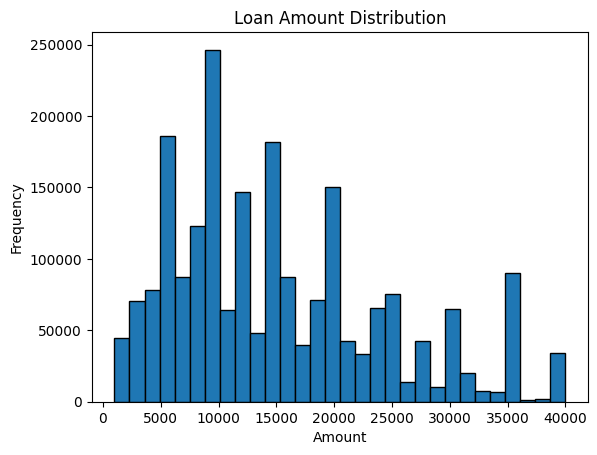

In [ ]:
plt.hist(df_accepted['loan_amnt'], bins=30, edgecolor='black')
plt.title("Loan Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

Dari hasil visualisasi, terlihat bahwa jumlah pinjaman yang paling sering diajukan berada pada kisaran 5.000 hingga 15.000, dengan puncak tertinggi di sekitar 10.000. Frekuensi pengajuan pinjaman menurun seiring dengan meningkatnya jumlah pinjaman, terutama di atas 35.000. Pola ini menunjukkan bahwa mayoritas peminjam cenderung mengajukan pinjaman dalam jumlah sedang, bukan dalam jumlah yang terlalu kecil atau sangat besar.

In [ ]:
# Print basic statistics
print("Statistical Summary:")
print(df_accepted['loan_amnt'].describe())

# Additional metrics
print("\nSkewness:", round(df_accepted['loan_amnt'].skew(), 2))  # Measure of asymmetry
print("Kurtosis:", round(df_accepted['loan_amnt'].kurt(), 2))   # Measure of tail heaviness

Statistical Summary:
count    2.137072e+06
mean     1.518515e+04
std      9.212660e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.300000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

Skewness: 0.77
Kurtosis: -0.14


Dari hasil yang ditampilkan, nilai skewness sebesar 0.77 menunjukkan bahwa distribusi jumlah pinjaman sedikit condong ke kanan, tetapi tidak terlalu ekstrem. Ini berarti ada beberapa nilai pinjaman yang lebih besar dari rata-rata, namun distribusi masih relatif simetris. Sedangkan nilai kurtosis sebesar -0.14 mengindikasikan bahwa distribusi memiliki puncak yang hampir normal, tanpa ekor yang terlalu berat.

Berdasarkan analisa skewness dan kurtosis, tidak dibutuhkan penyeimbangan terhadap data loan_amnt
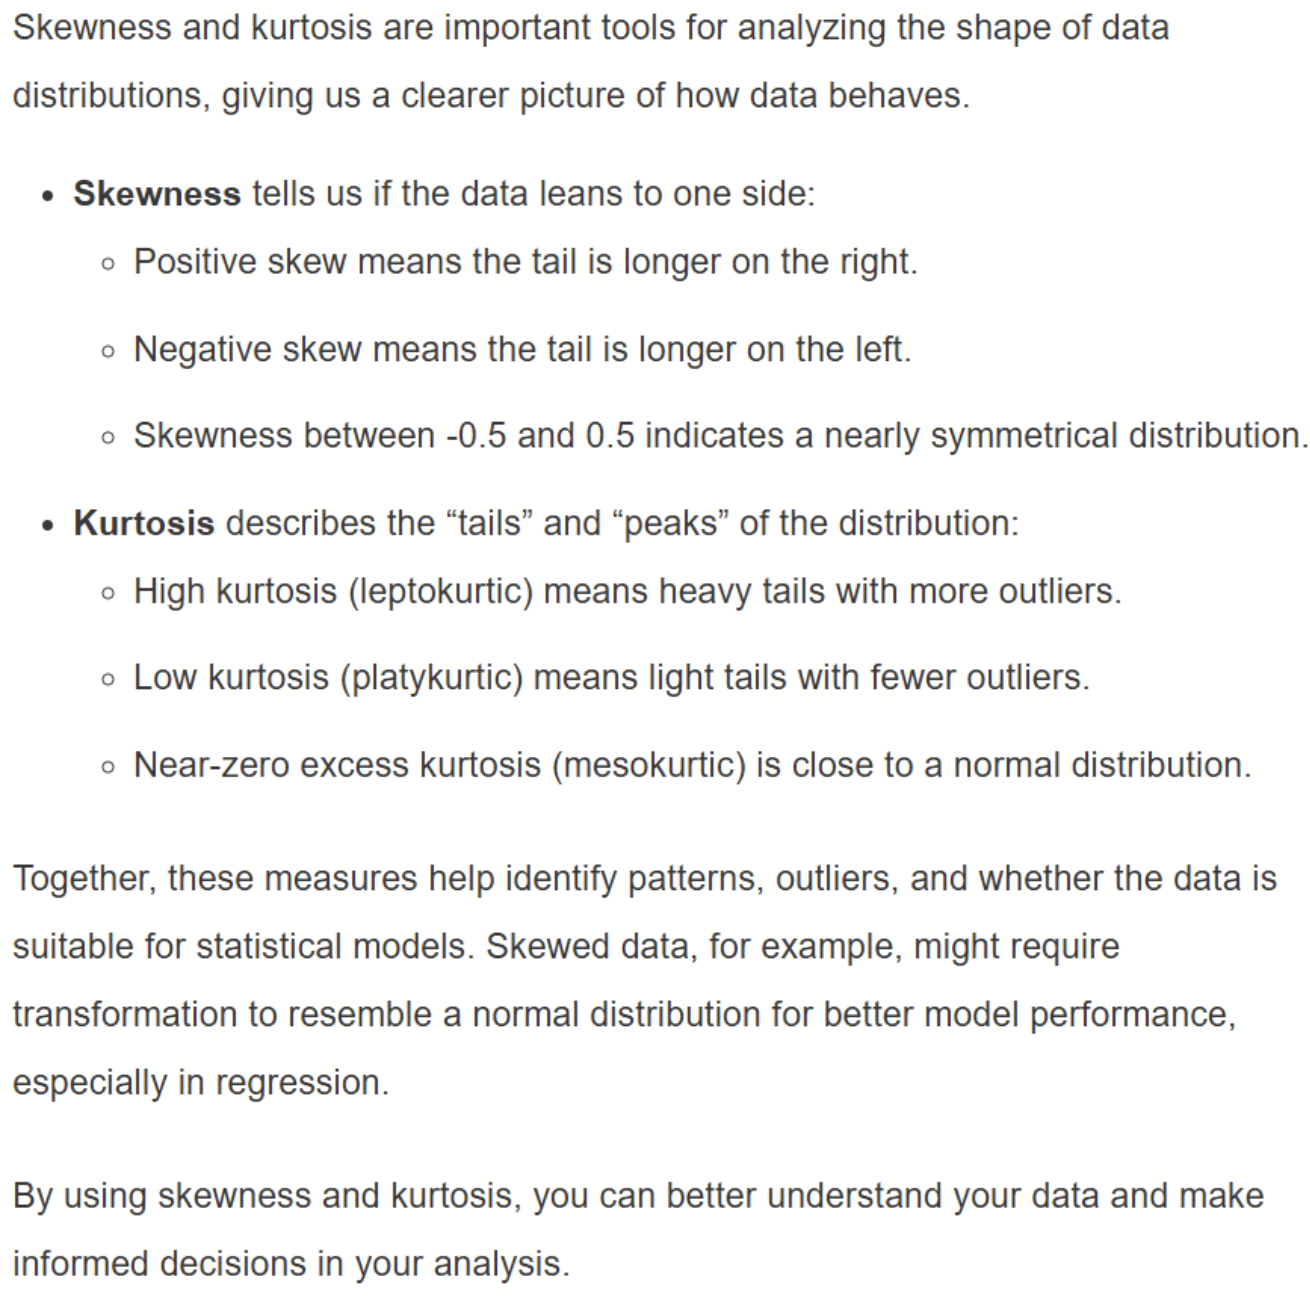

Cek variable grade yang potensi imbalance

In [ ]:
# For classification target (e.g., 'label')
class_counts = df_accepted['grade_encoded'].value_counts()
print("Class Distribution:")
print(class_counts)

# Normalized percentages
class_percent = df_accepted['grade_encoded'].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(class_percent.round(2))

Class Distribution:
grade_encoded
1    627382
2    619191
0    409965
3    305173
4    126146
5     38246
6     10969
Name: count, dtype: int64

Class Percentages:
grade_encoded
1    29.36
2    28.97
0    19.18
3    14.28
4     5.90
5     1.79
6     0.51
Name: proportion, dtype: float64


Dari hasil yang ditampilkan, terlihat bahwa distribusi kelas tidak merata. Kelas B dan C memiliki jumlah observasi terbesar dengan masing-masing sekitar 29.36% dan 28.97%, sedangkan kelas G memiliki jumlah yang sangat kecil, hanya 0.51%. Ketidakseimbangan ini dapat mempengaruhi performa model dalam tugas klasifikasi. Oleh karena itu, teknik penanganan ketidakseimbangan data seperti oversampling pada kelas minoritas atau undersampling pada kelas mayoritas mungkin diperlukan untuk memastikan bahwa model tidak bias terhadap kelas dengan jumlah data yang lebih besar.

In [ ]:
majority_count = class_counts.max()
minority_count = class_counts.min()
imbalance_ratio = majority_count / minority_count
print(f"\nImbalance Ratio: {imbalance_ratio:.1f}:1")


Imbalance Ratio: 57.2:1


57.2:1 sangat tidak imbalance

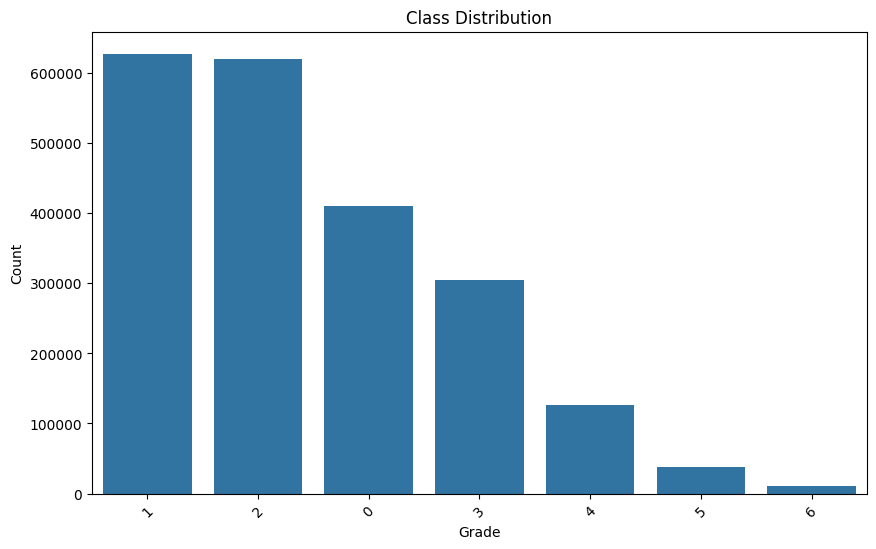

In [ ]:
# Plot class frequencies
plt.figure(figsize=(10, 6))
sns.countplot(x='grade_encoded', data=df_accepted, order=df_accepted['grade_encoded'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Take 10% of your data (adjust fraction as needed)
small_df = df_accepted.sample(frac=0.1, random_state=42)

# Proceed with small_df for your experiments
X = small_df.drop('grade_encoded', axis=1)
y = small_df['grade_encoded']

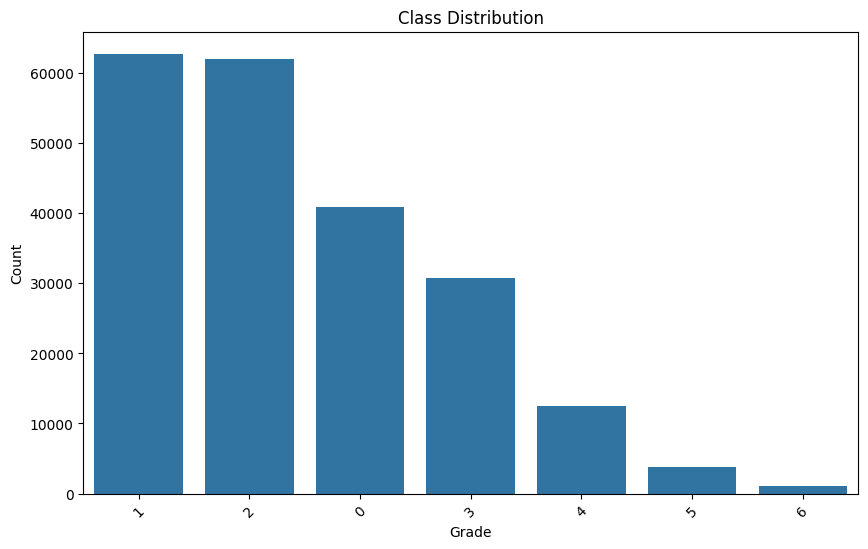

In [ ]:
# Plot class frequencies
plt.figure(figsize=(10, 6))
sns.countplot(x='grade_encoded', data=small_df, order=small_df['grade_encoded'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# For classification target (e.g., 'label')
class_counts = small_df['grade_encoded'].value_counts()
print("Class Distribution:")
print(class_counts)

# Normalized percentages
class_percent = small_df['grade_encoded'].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(class_percent.round(2))

Class Distribution:
grade_encoded
1    62749
2    61943
0    40824
3    30806
4    12552
5     3769
6     1064
Name: count, dtype: int64

Class Percentages:
grade_encoded
1    29.36
2    28.99
0    19.10
3    14.42
4     5.87
5     1.76
6     0.50
Name: proportion, dtype: float64


In [ ]:
majority_count = class_counts.max()
minority_count = class_counts.min()
imbalance_ratio = majority_count / minority_count
print(f"\nImbalance Ratio: {imbalance_ratio:.1f}:1")


Imbalance Ratio: 59.0:1


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class weights
classes = np.unique(small_df['grade_encoded'])
y = small_df['grade_encoded']
weights = compute_class_weight('balanced', classes=classes, y=y)

# Convert to dictionary format
class_weights = dict(zip(classes, weights))
print("Class Weights:", class_weights)

Class Weights: {np.int8(0): np.float64(0.7478339072254416), np.int8(1): np.float64(0.48653478826071217), np.int8(2): np.float64(0.4928655607344079), np.int8(3): np.float64(0.9910267944092523), np.int8(4): np.float64(2.4322475644177364), np.int8(5): np.float64(8.100178145017624), np.int8(6): np.float64(28.693206229860365)}


In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import numpy as np

from lightgbm import LGBMClassifier

In [ ]:
X = small_df[['loan_amnt', 'annual_inc']]
y = small_df['grade_encoded']  # This contains 'A','B',etc.


# Split into train/test (stratified to preserve imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

In [ ]:
sample_weights = compute_sample_weight(class_weights, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Baseline model (NO weighting)
model_baseline = RandomForestClassifier(random_state=42)
model_baseline.fit(X, y)  # No weights

# Weighted model (WITH your class weights)
model_weighted = RandomForestClassifier(random_state=42)
model_weighted.fit(X, y, sample_weight=sample_weights)  # Your weights

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_baseline = model_baseline.predict(X)
y_pred_weighted = model_weighted.predict(X)

# Print metrics
print("=== Baseline Model (No Weighting) ===")
print(classification_report(y, y_pred_baseline))

print("\n=== Weighted Model ===")
print(classification_report(y, y_pred_weighted))

=== Baseline Model (No Weighting) ===
              precision    recall  f1-score   support

           0       0.57      0.38      0.46     40824
           1       0.48      0.67      0.56     62749
           2       0.50      0.59      0.54     61943
           3       0.73      0.38      0.50     30806
           4       0.77      0.40      0.53     12552
           5       0.84      0.40      0.54      3769
           6       0.87      0.42      0.57      1064

    accuracy                           0.53    213707
   macro avg       0.68      0.46      0.53    213707
weighted avg       0.56      0.53      0.52    213707


=== Weighted Model ===
              precision    recall  f1-score   support

           0       0.42      0.57      0.49     40824
           1       0.59      0.43      0.50     62749
           2       0.66      0.38      0.48     61943
           3       0.55      0.44      0.49     30806
           4       0.37      0.57      0.45     12552
           5    

# **Rejected**

In [ ]:
df_rejected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27646225 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   amount_requested           float64       
 1   application_date           datetime64[ns]
 2   risk_score                 int16         
 3   debt-to-income_ratio       float64       
 4   policy_code                int8          
 5   zip_3digits                int16         
 6   loan_title_encoded         int32         
 7   state_encoded              int8          
 8   employment_length_encoded  int8          
dtypes: datetime64[ns](1), float64(2), int16(2), int32(1), int8(3)
memory usage: 1.1 GB


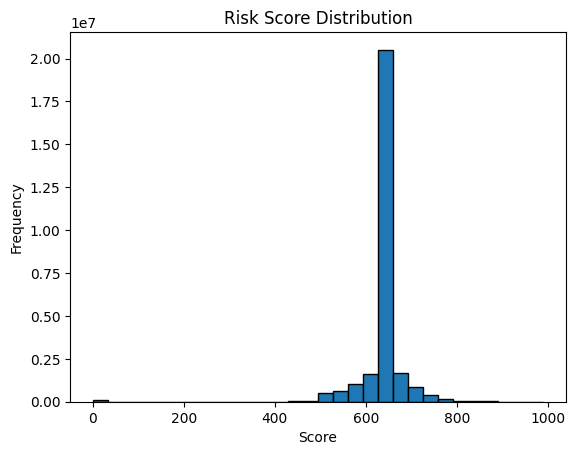

In [ ]:
plt.hist(df_rejected['risk_score'], bins=30, edgecolor='black')
plt.title("Risk Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Take 10% of your data (adjust fraction as needed)
small_df_rejected = df_rejected.sample(frac=0.1, random_state=42)  # random_state for reproducibility

# small_df_rejected.drop('Risk_Score_processed', axis=1)
# small_df_rejected.drop('Risk_Score_scaled', axis=1)
# small_df_rejected.drop('Risk_Scaled', axis=1)

# Proceed with small_df for your experiments
X = small_df_rejected.drop('risk_score', axis=1)
y = small_df_rejected['risk_score']

In [ ]:
# Print basic statistics
print("Statistical Summary:")
print(df_rejected['risk_score'].describe())

# Additional metrics
print("\nSkewness:", round(small_df_rejected['risk_score'].skew(), 2))  # Measure of asymmetry
print("Kurtosis:", round(small_df_rejected['risk_score'].kurt(), 2))   # Measure of tail heaviness

Statistical Summary:
count    2.764622e+07
mean     6.340770e+02
std      5.190879e+01
min      0.000000e+00
25%      6.370000e+02
50%      6.370000e+02
75%      6.370000e+02
max      9.900000e+02
Name: risk_score, dtype: float64

Skewness: -5.66
Kurtosis: 70.03


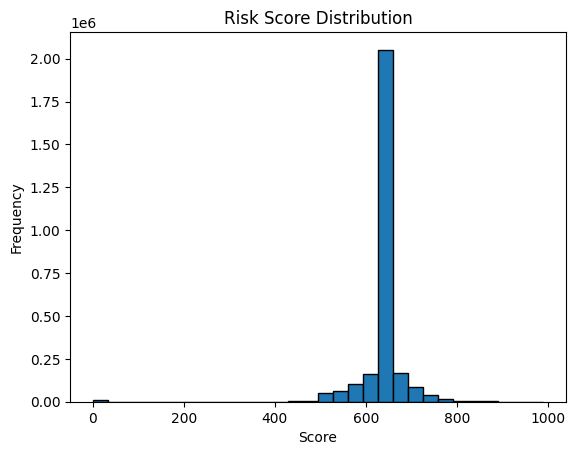

In [ ]:
plt.hist(small_df_rejected['risk_score'], bins=30, edgecolor='black')
plt.title("Risk Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

# Clip top/bottom 1%
small_df_rejected['Risk_Score_processed'] = winsorize(small_df_rejected['risk_score'], limits=[0.01, 0.01])

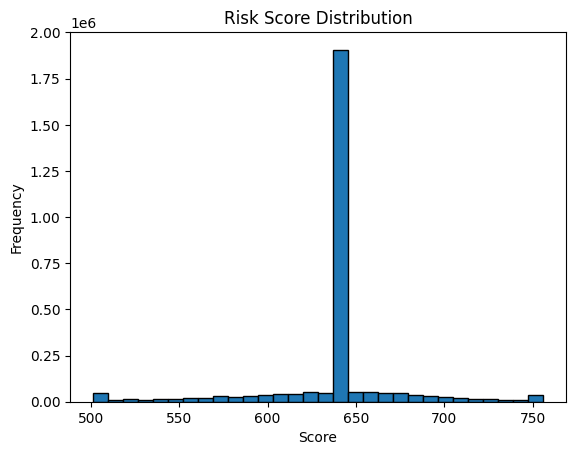

In [ ]:
plt.hist(small_df_rejected['Risk_Score_processed'], bins=30, edgecolor='black')
plt.title("Risk Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Print basic statistics
print("Statistical Summary:")
print(small_df_rejected['Risk_Score_processed'].describe())

# Additional metrics
print("\nSkewness:", round(small_df_rejected['Risk_Score_processed'].skew(), 2))  # Measure of asymmetry
print("Kurtosis:", round(small_df_rejected['Risk_Score_processed'].kurt(), 2))   # Measure of tail heaviness

Statistical Summary:
count    2.764622e+06
mean     6.353511e+02
std      3.636900e+01
min      5.010000e+02
25%      6.370000e+02
50%      6.370000e+02
75%      6.370000e+02
max      7.560000e+02
Name: Risk_Score_processed, dtype: float64

Skewness: -0.61
Kurtosis: 4.84


C:\Users\TUF A15\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:
from sklearn.preprocessing import RobustScaler
# A. Standard Scaling (if using linear models/NNs)
from sklearn.preprocessing import StandardScaler

# scaler = RobustScaler()
# df_rejected['Risk_Score_scaled'] = scaler.fit_transform(df_rejected[['Risk_Score_processed']])

small_df_rejected['Risk_Scaled'] = StandardScaler().fit_transform(small_df_rejected[['Risk_Score_processed']])

# B. Keep as-is for tree-based models (LightGBM/RF/XGBoost)
# They handle skewed distributions well

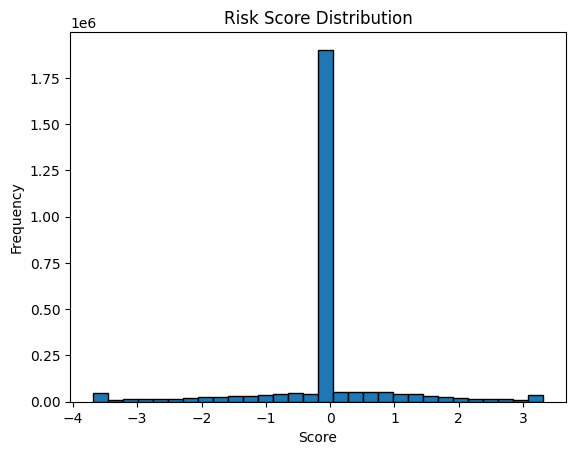

In [ ]:
plt.hist(small_df_rejected['Risk_Scaled'], bins=30, edgecolor='black')
plt.title("Risk Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Print basic statistics
print("Statistical Summary:")
print(small_df_rejected['Risk_Scaled'].describe())

# Additional metrics
print("\nSkewness:", round(small_df_rejected['Risk_Scaled'].skew(), 2))  # Measure of asymmetry
print("Kurtosis:", round(small_df_rejected['Risk_Scaled'].kurt(), 2))   # Measure of tail heaviness

Statistical Summary:
count    2.764622e+06
mean     1.047402e-15
std      1.000000e+00
min     -3.694112e+00
25%      4.533707e-02
50%      4.533707e-02
75%      4.533707e-02
max      3.317355e+00
Name: Risk_Scaled, dtype: float64

Skewness: -0.61
Kurtosis: 4.84


In [ ]:
from scipy.stats.mstats import winsorize
small_df_rejected['Risk_Winsorized'] = winsorize(small_df_rejected['Risk_Scaled'], limits=[0.01, 0.01])

In [ ]:
# Print basic statistics
print("Statistical Summary:")
print(small_df_rejected['Risk_Winsorized'].describe())

# Additional metrics
print("\nSkewness:", round(small_df_rejected['Risk_Winsorized'].skew(), 2))  # Measure of asymmetry
print("Kurtosis:", round(small_df_rejected['Risk_Winsorized'].kurt(), 2))   # Measure of tail heaviness

Statistical Summary:
count    2.764622e+06
mean     1.047402e-15
std      1.000000e+00
min     -3.694112e+00
25%      4.533707e-02
50%      4.533707e-02
75%      4.533707e-02
max      3.317355e+00
Name: Risk_Winsorized, dtype: float64

Skewness: -0.61
Kurtosis: 4.84


C:\Users\TUF A15\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
